# Electric Rotor Temperature Prediction

# FIT5149 S1, 2021



### Student Name: Chaitanya Srinevas
### Student ID: 31216072


#### Model the rotor temperatures of a permanent magnet synchronous motor (PMSM) in real-time.

Language: R 3.6.3 

IDE: Jupyter Notebook

Libraries used:
- ggplot2
- reshape2
- RColorBrewer
- grid
- gridExtra
- stats
- scales
- ggpubr
- xgboost
- randomforest
- metrics

# Table of Contents


1. Introduction
2. Data Exploration
3. Exploratory Data Analysis
4. Methodology
5. Model Development
6. Model Interpretation
7. Results and discussion
8. Conclusion
9. References

## 1. Introduction



This project aims to estimate temperature sequences inside Permanent Magnet Synchronous Motors from given input sequences, that is, currents, voltages, coolant and ambient temperatures, and torque as well as motor speed. All sensor data is recorded on a testbench. The aim of the data analysis is to build a model from PMSM data that can be used to predict the temperature of the motor.

PMSM is a suitable alternative in different industry applications because of its high force and force densities alongside a high level of productivity.

Due to the intricate structure of an electric traction drive, direct measurement with thermal sensors is not possible for rotor temperatures, and even in case of the stator temperatures, sensor outage or even just deterioration can't be administered properly without redundant modeling. In addition, precise thermal modeling gets more and more important with the rising relevance of functional
safety.


The first section of the project shows loading of the dataset and the exploratory data analysis (EDA) performed to explore and understand the data. Various levels of analysis was done including Univarate analysis, Bivariate Analysis and Multi variate analysis. 

Upon the analysis, I tried to model the data using Linear Regression model which presented with low R^2, low accuracy and high RMSE for the models. The analysis looks at each attribute (variable) in the data to understand the nature and distribution of the attribute values. It also examines the correlation between the variables through visual analysis. A summary at the end highlights the key findings of the EDA.

The second section shows the development of the model through linear and non linear models. It details the process used to build the model and shows the model at key points in the development process. After analysing the linear regression models, the jupyter notebook explores the other models that can fit the data well.  The final model is then presented along with an analysis and interpretation of the model. This section concludes with the results of using the model to predict house prices for the data in the development dataset.

Then the document focuses on Ridge and Lasso Regression for adding penalty term to the model and increase the model accuracy. Lasso Regularization can also be used for feature engineering and tells us which variables have the most influence on the target variable which is essential for the Inference task. Lastly, the document tries to emphasize on non-linear models for improving the model and shows the RMSE value. Non linear models were applied because the visual output of Q-Q plot and Residual vs Fitted plot depicted that there is a non linear relationship.


The final section provides the details of the model metrics to be compared and the selected model




###  Data Set Description

The data set contains 15,147 instances, each of which have 13 columns. The first 8 columns corresponding to the attributes or commonly said as the independent/predictor variables of the model  and the target/response variable which is the rotor temperature (pm)  The attributes are: 

1. Ambient
2. Coolant
3. u_d
4. u_q
5. motor_speed
6. torqu
7. i_d
8. i_q
9. pm: The rotor temperature
10. stator_yoke: not required for the task
11. stator_winding: not required for the task
12. stator_tooth: not required for the task
13. profile_id

### Prediction Task
For the prediction task, the underlying problem is to predict the rotor temperature using the collected 8 attributes. 
To measure the performance of my model, I have ensured the following: 
1. Split the original data into training and testing set (profile ids 72 and 81)
2. Fit the model using the training set, do the prediction on the test set and compute some performance metrics.

In this task, in addition to the final model, I have also:
1. compared at least one model that is different from my final model,
2. describe and justify the choice of my models,
3. assess, analyze and interpret my results


### Inference Task
The purpose of the inference task is to identify the key factors that have strong affect on the rotor temperature.  Inference can be based on variable correlation analysis, regression equations. The descriptions and the accompanying. To ensure in understanding in the impact of various variables, I have tried to implement statistical evidence such as correlations, p-values and interpret the identified attribute subset.


### 1.1  Installing all the packages required for the notebook

In [72]:
# Install the necessary packages
install.packages("dlookr")
install.packages("ggplot2")
install.packages('ggpubr')
install.packages("xgboost")
install.packages("RColorBrewer")
install.packages("grid")
install.packages("gridExtra")
install.packages("stats")
install.packages("scales")
install.packages("ggpubr")

install.packages("pdp")
install.packages("Metrics")
install.packages("varImp")
install.packages("Metrics")


Warning message:
"package 'dlookr' is in use and will not be installed"Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"package 'ggpubr' is in use and will not be installed"


  There is a binary version available but the source version is later:
         binary  source needs_compilation
xgboost 1.3.2.1 1.4.1.1              TRUE

  Binaries will be installed


Warning message:
"package 'xgboost' is in use and will not be installed"Warning message:
"package 'RColorBrewer' is in use and will not be installed"Warning message:
"package 'grid' is not available (for R version 3.6.1)"Warning message:
"package 'grid' is a base package, and should not be updated"Warning message:
"package 'gridExtra' is in use and will not be installed"Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"Warning message:
"package 'scales' is in use and will not be installed"Warning message:
"package 'ggpubr' is in use and will not be installed"

package 'pdp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pdp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\pdp\CITATION to C:\ProgramData\Anaconda3\Lib\R\library\pdp\CITATION: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\pdp\data\Rdata.rdb to C:\ProgramData\Anaconda3\Lib\R\library\pdp\data\Rdata.rdb: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\pdp\data\Rdata.rds to C:\ProgramData\Anaconda3\Lib\R\library\pdp\data\Rdata.rds: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\pdp\data\Rdata.rdx to C:\ProgramData\Anaconda3\Lib\R\library\pdp\data\Rdata.rdx: Permission denied"Warning message in file.copy(savedcopy, 


The downloaded binary packages are in
	C:\Users\Digital India\AppData\Local\Temp\RtmpElBW5O\downloaded_packages


Warning message:
"package 'Metrics' is in use and will not be installed"Warning message:
"package 'varImp' is in use and will not be installed"Warning message:
"package 'Metrics' is in use and will not be installed"

In [215]:
install.packages("varImp")
install.packages("PerformanceAnalytics")

Warning message:
"package 'varImp' is in use and will not be installed"Warning message:
"package 'PerformanceAnalytics' is in use and will not be installed"

### 1.2 Load the required libraries

In [73]:
library(ggplot2)
library(reshape2)
library(dlookr)
library(RColorBrewer)
library(grid)
library(gridExtra)
library(stats)
library(scales)
library(ggpubr)
library(xgboost)
library(pdp)
library(tidyverse)          
library(olsrr)              
             
library(Metrics)
library(varImp)
library("PerformanceAnalytics")
library(glmnet)  # for ridge regression
library("Metrics")
library("MLmetrics")



In [216]:
library(varImp)
library(caret)
library(e1071)

### 2. Load, Describe and Prepare the dataset

In [74]:
# Load the original dataset
pmorigDF <- read.csv("pmsm_temperature_data_A1_2021.csv")

In [75]:
# Display the dimensions
cat("The PMSM dataset has", dim(pmorigDF)[1], "records, each with", dim(pmorigDF)[2],
    "attributes. The structure is:\n\n")

# Display the structure
str(pmorigDF)

cat("\nThe first few and last few records in the dataset are:")
# Inspect the first few records
head(pmorigDF)
# And the last few
tail(pmorigDF)

cat("\nBasic statistics for each attribute are:")

# Statistical summary 
summary(pmorigDF)



The PMSM dataset has 15147 records, each with 13 attributes. The structure is:

'data.frame':	15147 obs. of  13 variables:
 $ ambient       : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant       : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d           : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q           : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed   : num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque        : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d           : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q           : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm            : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...
 $ stator_yoke   : num  -0.735 -0.408 -1.53 -0.807 -1.747 ...
 $ stator_tooth  : num  -0.434 0.187 -1.68 -0.501 -1.986 ...
 $ stator_winding: num  -0.274 0.56 -1.731 -0.347 -1.971 ...
 $ profile_id    : int  4 4 4 4 4 4 4 4 4 4 ...

The first few and last few records in the dataset are:

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0.1177,-1.041,-1.0267,0.9251,1.2125,0.3587,-0.8343,0.3229,-0.08831,-0.7353,-0.4340,-0.2743,4
-0.5548,-1.087,-1.2259,0.5126,2.0241,0.2842,-1.3638,0.2340,0.71040,-0.4084,0.1867,0.5596,4
-0.7722,-1.064,0.2989,0.9562,-0.1402,-0.2591,1.0291,-0.2457,-1.59260,-1.5300,-1.6798,-1.7312,4
0.2200,-1.083,-1.0261,0.9278,1.2125,0.3574,-0.8381,0.3228,-0.14167,-0.8074,-0.5005,-0.3472,4
0.4016,-1.079,0.3155,-0.7094,-0.9519,-0.2563,1.0292,-0.2457,-1.96489,-1.7470,-1.9858,-1.9714,4
-0.7698,-1.090,0.2999,0.9590,-0.1402,-0.2593,1.0291,-0.2457,-1.77564,-1.5569,-1.6944,-1.7499,4


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
15142,-0.6975,1.49689,0.3176,-1.325,-1.22243,-0.2556,1.0291,-0.2457,-0.835640,0.7105,0.1433,-0.2502,81
15143,-0.1489,1.74756,0.2999,-1.295,-1.22243,-0.2556,1.0291,-0.2457,-0.993255,0.4484,-0.2863,-0.6718,81
15144,-0.5091,1.46453,-0.7905,1.208,0.80468,0.3245,-0.2591,0.3257,-0.004079,1.2046,0.9231,0.7107,81
15145,-0.1557,-0.04516,0.3011,-1.294,-1.22243,-0.2556,1.0291,-0.2457,-0.771476,-0.7347,-1.0679,-1.1544,81
15146,-0.1561,-0.04458,0.3001,-1.294,-1.22243,-0.2556,1.0292,-0.2457,-0.663379,-0.7347,-1.0679,-1.1360,81
15147,-0.7673,-0.30994,0.3229,1.125,-0.03887,-0.2813,1.0212,-0.2752,-1.903265,-0.9610,-1.1174,-1.1637,81



Basic statistics for each attribute are:

    ambient          coolant            u_d              u_q        
 Min.   :-3.328   Min.   :-1.237   Min.   :-1.654   Min.   :-1.815  
 1st Qu.:-0.539   1st Qu.:-0.691   1st Qu.:-0.486   1st Qu.:-1.268  
 Median :-0.140   Median :-0.045   Median : 0.300   Median :-0.381  
 Mean   :-0.107   Mean   : 0.181   Mean   : 0.110   Mean   :-0.191  
 3rd Qu.: 0.498   3rd Qu.: 1.010   3rd Qu.: 0.350   3rd Qu.: 0.741  
 Max.   : 2.711   Max.   : 2.295   Max.   : 2.273   Max.   : 1.770  
  motor_speed         torque            i_d              i_q        
 Min.   :-1.222   Min.   :-3.316   Min.   :-3.176   Min.   :-3.309  
 1st Qu.:-1.222   1st Qu.:-0.258   1st Qu.:-0.552   1st Qu.:-0.246  
 Median :-0.432   Median :-0.256   Median : 0.587   Median :-0.246  
 Mean   :-0.191   Mean   :-0.084   Mean   : 0.177   Mean   :-0.081  
 3rd Qu.: 0.674   3rd Qu.: 0.357   3rd Qu.: 1.029   3rd Qu.: 0.350  
 Max.   : 2.024   Max.   : 3.014   Max.   : 1.060   Max.   : 2.914  
       pm          stator_yoke    

The numbers of unique values for each attribute are:

ambient        coolant            u_d            u_q    motor_speed 
         14263          14513          15126          15100           9434 
        torque            i_d            i_q             pm    stator_yoke 
          9788          10484          12451          15139          13973 
  stator_tooth stator_winding     profile_id 
         13656          14758             52

As per the question, I have removed the columns namely <b> stator yoke", stator winding" and stator tooth </b>

In [76]:

pmDF <- pmorigDF[,1:9]     # # Removing the unnecessary columns - Keep only first 9 columns 

cat('\nStructure of the dataset :\n\n')
str(pmDF)


Structure of the dataset :

'data.frame':	15147 obs. of  9 variables:
 $ ambient    : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant    : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d        : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q        : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed: num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque     : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d        : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q        : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm         : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...


We will explore the data in detail.

#### 2.1 Create train and test data to build and test the models

Split the original data into training and testing set. As stated, only the data that belongs to profile ids 72 and 81 should be in the test_data set and rest all other data should be in the training data.


In [77]:
# Split the data into train and test - orig
test <- pmorigDF[(pmorigDF$profile_id == 72)|(pmorigDF$profile_id == 81),]
train <- pmorigDF[(pmorigDF$profile_id != 72)&(pmorigDF$profile_id != 81),]


In [78]:
train_pm <- train['pm']  # Response variable
test_pm <- test['pm']


trainDF <- train[,1:8]   # Predictors
testDF <- test[,1:8]

# Print the shapes
cat("Shape of original data\t: ", dim(pmorigDF))
cat("\nShape of train data\t: ", dim(trainDF))
cat("\nShape of test data\t: ", dim(testDF))

Shape of original data	:  15147 13
Shape of train data	:  9652 8
Shape of test data	:  5495 8

The train dataset has 9652 rows and 8 columns and test dataset has 5495 rows and 9 columns

In [79]:
head(trainDF)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q
0.1177,-1.041,-1.0267,0.9251,1.2125,0.3587,-0.8343,0.3229
-0.5548,-1.087,-1.2259,0.5126,2.0241,0.2842,-1.3638,0.2340
-0.7722,-1.064,0.2989,0.9562,-0.1402,-0.2591,1.0291,-0.2457
0.2200,-1.083,-1.0261,0.9278,1.2125,0.3574,-0.8381,0.3228
0.4016,-1.079,0.3155,-0.7094,-0.9519,-0.2563,1.0292,-0.2457
-0.7698,-1.090,0.2999,0.9590,-0.1402,-0.2593,1.0291,-0.2457


In [80]:
head(testDF)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q
9653,-0.6377,-0.04414,1.8583,-0.1569,0.1434,-1.7332,-0.8767,-1.6465
9654,-0.1435,-0.55149,0.2990,-1.2715,-1.2224,-0.2556,1.0291,-0.2457
9655,-0.3561,1.74732,1.3822,1.2475,0.8691,-0.8936,-0.1888,-0.8834
9656,-0.1591,-0.72018,0.3498,-1.2639,-1.2224,-0.2556,1.0291,-0.2457
9657,-0.1303,-0.09399,-1.1096,0.4486,-0.1825,1.2612,0.1768,1.3878
9658,-0.1411,-0.83836,1.0281,1.4850,0.9783,-0.6664,-0.2155,-0.6495


## 3. Exploratory Data Analysis

Exploratory data analysis is a great way to understand the properties of the data and the insights present in the data. Using a blend of graphical and statistical exploratory data analysis, the following section explores the data as per the below analysis:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Summary

The dataset seems to have only numerical data and no categorical or ordinal data. All the features in the dataset are numerical



The following domain knowledge about the variables can be explained below: 
1. Ambient temperature as measured by a thermal sensor located closely to the stator.
2. Coolant temperature. The motor is water cooled. Measurement is taken at outflow.
3. Voltage d-component
4. Torque induced by current.
5. Current d-component
6. Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared sensor.

### 3.1 Investigate Distribution of Each Variable, Univariate Analysis

In [81]:
attach(pmDF)

The following objects are masked from pmDF (pos = 6):

    ambient, coolant, i_d, i_q, motor_speed, pm, torque, u_d, u_q



##### Viewing the variable distributions using boxplots

We will have a look at the numerical attributes which are ambient, coolant, u_d, u_q, motor speed, torque, i_d and i_q and lastly also our target variable which is pm

No id variables; using all as measure variables


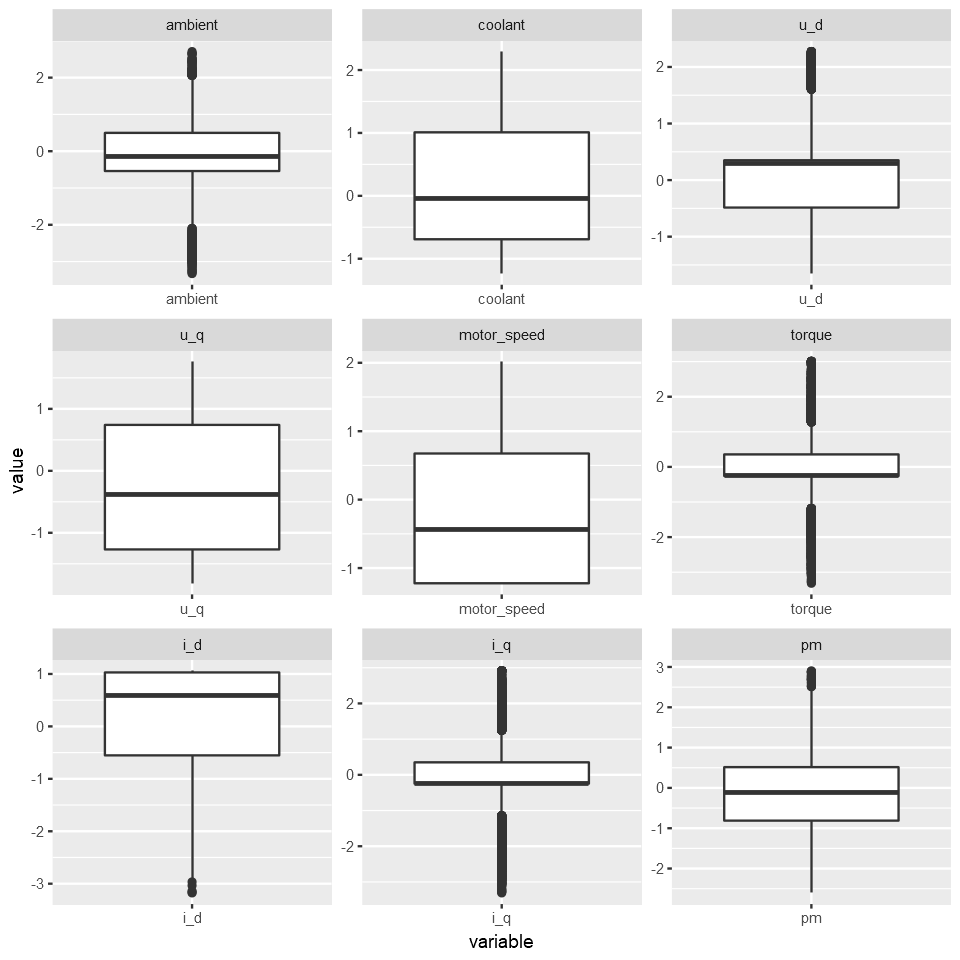

In [82]:
# Generate box plots of all variables
m1 <- melt(as.data.frame(pmDF))
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

#### View the variable distributions and descriptive statisrtics using histograms, barcharts etc.

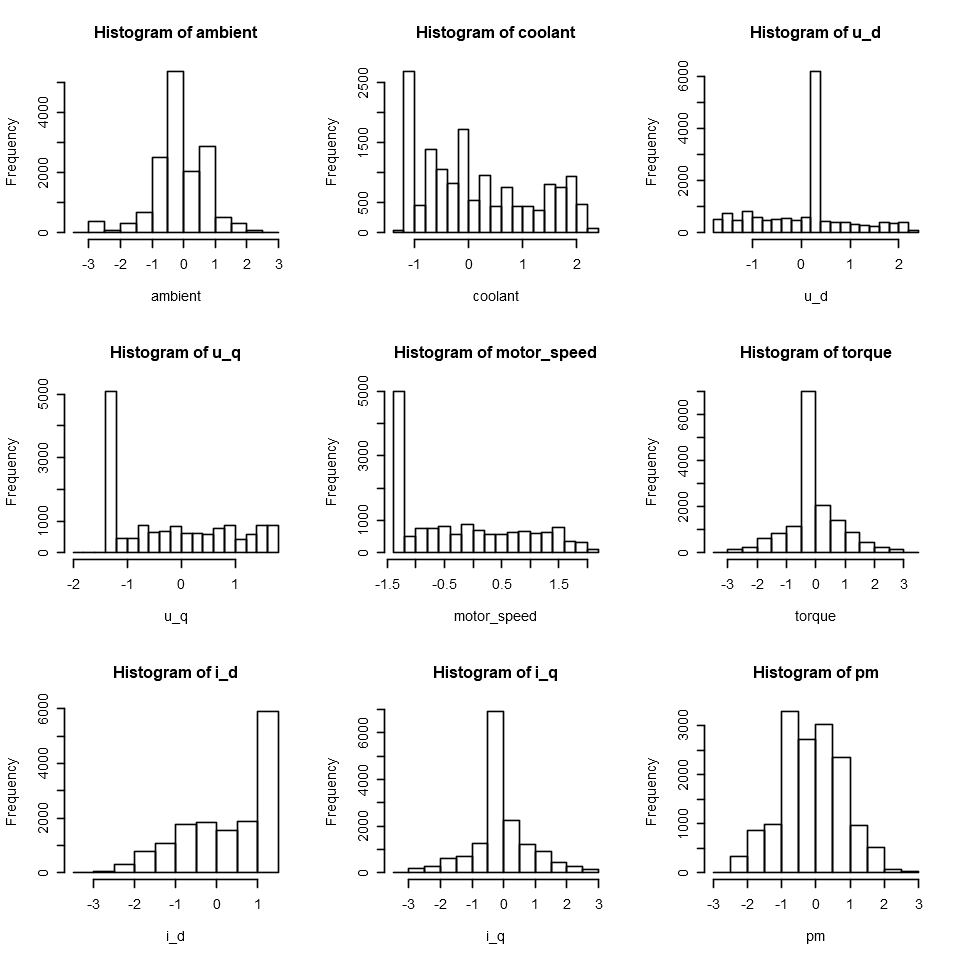

In [83]:
# Plot a histogram or bar chart of each variable
# Independent Variables: ambient, coolant, u_d, u_q, motor_speed, torque, i_d, i_q
# Response Variable: pm

par(mfrow = c(3,3))

hist(ambient)
hist(coolant)
hist(u_d)
hist(u_q)
hist(motor_speed)
hist(torque)
hist(i_d)
hist(i_q)
hist(pm)

In [84]:
# Provide the descriptive statistics of all numerical variables
# all the variables of pmDF are numerical
describe(pmDF)

variable,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,p00,...,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
ambient,15147,0,-0.10740,0.8330,0.006768,1.0371,-0.64820,1.8080,-3.328,...,-0.16974,-0.14028,-0.06055,0.3420,0.4981,0.6509,0.689,1.181,1.773,2.711
coolant,15147,0,0.18125,1.0321,0.008386,1.7003,0.46249,-1.0731,-1.237,...,-0.35517,-0.04497,0.32686,0.7597,1.0095,1.4067,1.748,1.947,2.180,2.295
u_d,15147,0,0.11019,0.9221,0.007492,0.8363,0.01786,-0.1774,-1.654,...,0.28670,0.30010,0.31414,0.3425,0.3503,0.5217,1.414,1.861,2.172,2.273
u_q,15147,0,-0.19096,1.0497,0.008529,2.0094,0.41884,-1.2658,-1.815,...,-0.79084,-0.38064,0.02206,0.5294,0.7410,0.9220,1.466,1.623,1.741,1.770
motor_speed,15147,0,-0.19126,1.0273,0.008347,1.8967,0.53819,-1.1062,-1.222,...,-0.86599,-0.43181,-0.02238,0.4381,0.6743,0.9419,1.421,1.614,1.943,2.024
torque,15147,0,-0.08396,0.9168,0.007450,0.6142,0.16202,1.4410,-3.316,...,-0.25564,-0.25564,-0.22984,0.1857,0.3565,0.5179,1.096,1.615,2.500,3.014
i_d,15147,0,0.17748,0.9690,0.007873,1.5816,-0.83495,-0.4701,-3.176,...,0.08566,0.58744,0.98704,1.0291,1.0291,1.0291,1.029,1.029,1.029,1.060
i_q,15147,0,-0.08147,0.9167,0.007449,0.5957,0.12265,1.4427,-3.309,...,-0.24572,-0.24571,-0.24126,0.2092,0.3499,0.4869,1.111,1.597,2.496,2.914
pm,15147,0,-0.12678,0.9198,0.007474,1.3265,-0.01404,-0.2370,-2.605,...,-0.38513,-0.12051,0.16143,0.4062,0.5153,0.6489,1.027,1.397,1.895,2.905


### 3.4 Taking a closer look at some of the features, Look at  Desnsity Plots

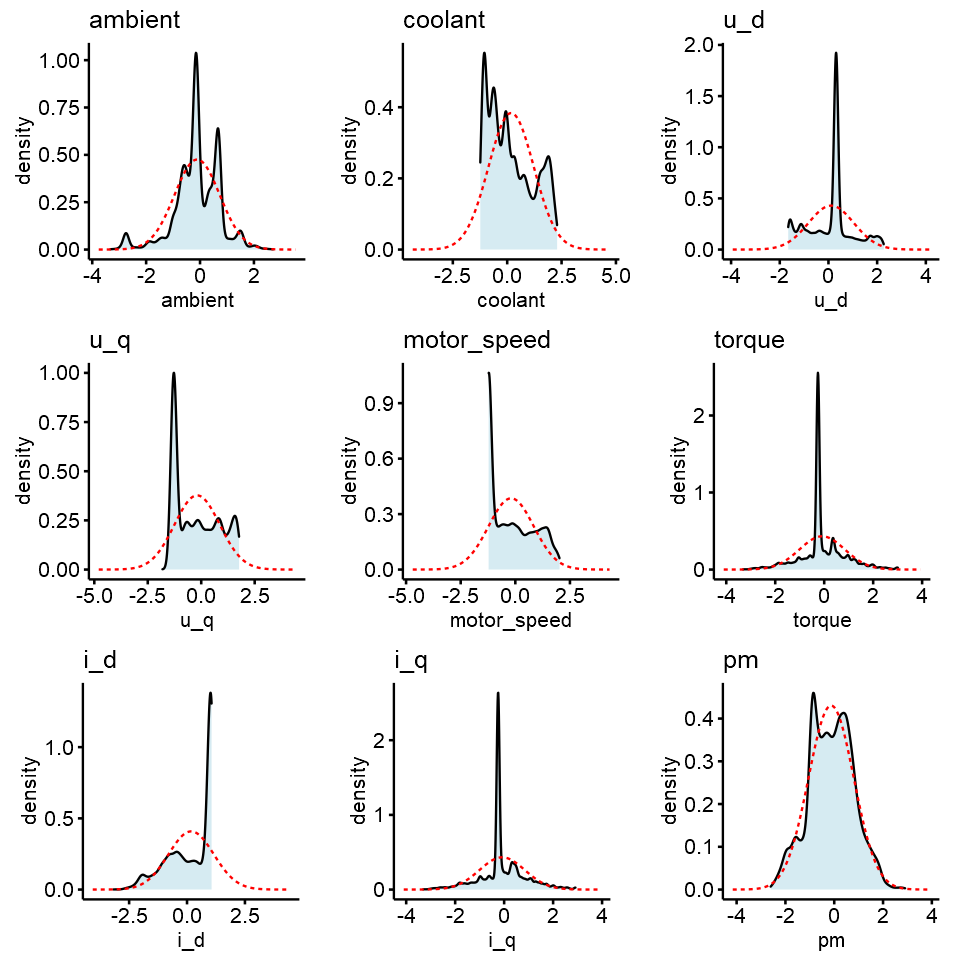

In [88]:
# Distribution plots
p1 <- ggdensity(pmDF, x = "ambient", fill = "lightblue", title = "ambient") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p2 <- ggdensity(pmDF, x = "coolant", fill = "lightblue", title = "coolant") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p3 <- ggdensity(pmDF, x = "u_d", fill = "lightblue", title = "u_d") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p4 <- ggdensity(pmDF, x = "u_q", fill = "lightblue", title = "u_q") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p5 <- ggdensity(pmDF, x = "motor_speed", fill = "lightblue", title = "motor_speed") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p6 <- ggdensity(pmDF, x = "torque", fill = "lightblue", title = "torque") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p7 <- ggdensity(pmDF, x = "i_d", fill = "lightblue", title = "i_d") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p8 <- ggdensity(pmDF, x = "i_q", fill = "lightblue", title = "i_q") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

p9 <- ggdensity(pmDF, x = "pm", fill = "lightblue", title = "pm") +
  stat_overlay_normal_density(color = "red", linetype = "dashed") +
  theme(aspect.ratio = 1)

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, ncol=3, nrow=3)


### 3.5 Insights dervied from box plot, describe() function, and the density plots (Univariate Analysis):

<b> From the above plots and statistical analysis, I have dervied:: </b>


<b>Box Plot </b>


1. The box plot shows that there are outliers present in the variables: ambient, u_d, torque, i_d i_q and the target variable p_m. Sometimes outliers are very crucial, simply dropping them will have significant impact. 

2. However, since we do not have sufficient information about the range of these variables to decide whether a particular outlier is due to a data error or it is a gneuine value none of these outliers are going to be removed.

3. For all the variables, many values are in negative which explains that log transformations are difficult and for some variables like i_q, torque, motor speed, coolant have median less than 0 therefore many values less than 0.

4. Medians are great because they are robust to outliers.

<b>Describe function :</b>

**From the description table the following insights, I have dervied:**
1. No NA values in any of the variables which explains that there are no null values in the dataset.
2. For perfect normal normal distribution skew is 0. Here ambient shows a skewness of -0.64 and i_d has a skewness of -0.83 have high negative skew left skewed distribution. 

3. coolant has +0.46 skew, u_q has skew of +0.41 and motor_speed has skew of +0.53. All of these variables have moderately positive skew which means they are skewed to the right. 

4. pm, u_d have almost zero skew, does not require any transformation of the variable.

5. torque and i_q have slight positive skew (right skewed), may not require any transformation. 
 
<b>Density plot:</b>


From the below density plots, I can derive the following insights:

**In a perfectly symmetrical distribution, the mean and the median are the same**
1. Ambient has right skew
2. Torque has a left skewed distribution 
3. torque and i_q have slight positive skew (right skewed).
4. The variable i_d has a highly negative skew


### 3.6 Investigating Pairs of Variables, Multivariate Analysis


In [92]:
# DIY correlation plot
# http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
# there's some truth to the quote that modern programming is often stitching together pieces from SO 

colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    ## trick: "don't create a new plot" thing by following the
    ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    ## This allows
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}



#### a) Scatterplot Matrix


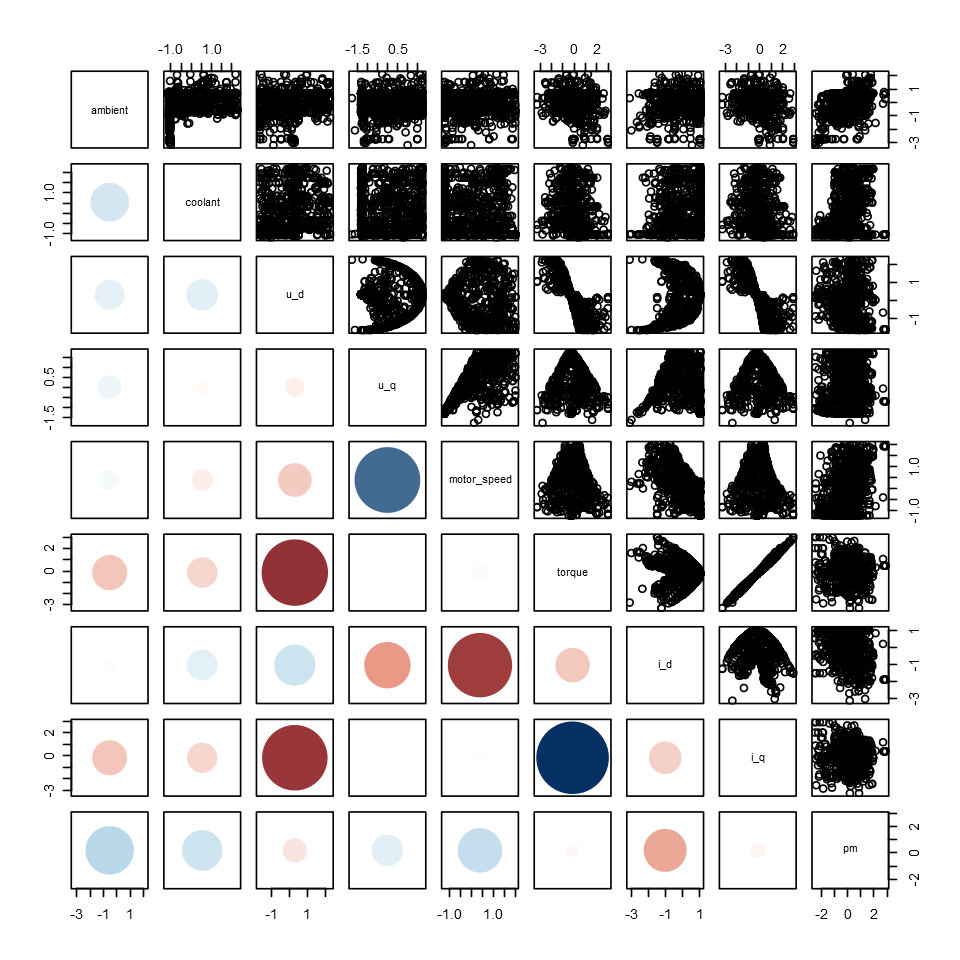

In [93]:
pairs(pmDF[sample.int(nrow(pmDF),1000),], lower.panel=panel.cor)

The scatterplot matrix shows many of these relationships are non-linear. Let us look at the correlation coefficents and other details for further analysis.

#### b) Correlation Coefficients

In [94]:
options(digits=4)
cor_mat<-cor(pmDF)
cor_mat

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm
ambient,1.00000,0.29806,0.14523,0.090443,0.09340,-0.216923,-0.02151,-0.215262,0.49579
coolant,0.29806,1.00000,0.15828,-0.040009,-0.06987,-0.161076,0.13281,-0.157715,0.33273
u_d,0.14523,0.15828,1.00000,-0.044241,-0.18795,-0.834603,0.31703,-0.811286,-0.08094
u_q,0.09044,-0.04001,-0.04424,1.000000,0.79804,-0.005299,-0.36226,0.001397,0.13218
motor_speed,0.09340,-0.06987,-0.18795,0.798042,1.00000,0.033811,-0.77070,0.019384,0.31229
torque,-0.21692,-0.16108,-0.83460,-0.005299,0.03381,1.000000,-0.22852,0.996858,-0.05482
i_d,-0.02151,0.13281,0.31703,-0.362259,-0.77070,-0.228519,1.00000,-0.200093,-0.28856
i_q,-0.21526,-0.15771,-0.81129,0.001397,0.01938,0.996858,-0.20009,1.000000,-0.06524
pm,0.49579,0.33273,-0.08094,0.132183,0.31229,-0.054821,-0.28856,-0.065236,1.00000




Let us look at statistical significance of these correlations

### 3.7 Investigating Pairs of Variables, Bivariate Analysis



From the above correlation matrix I have dervied the following conclusions:

1. Association between ambient with pm is a correlation coefficient of 0.50. 
2. Association between coolant with pm is a correlation coefficient of 0.33.

3. ambient and coolant have the highest correlation with pm among all of the variables.


In [95]:
# install.packages("PerformanceAnalytics")

Warning message:
"package 'PerformanceAnalytics' is in use and will not be installed"

In [96]:
# library("PerformanceAnalytics")
#  chart.Correlation(pmDF, histogram=TRUE, pch=19)

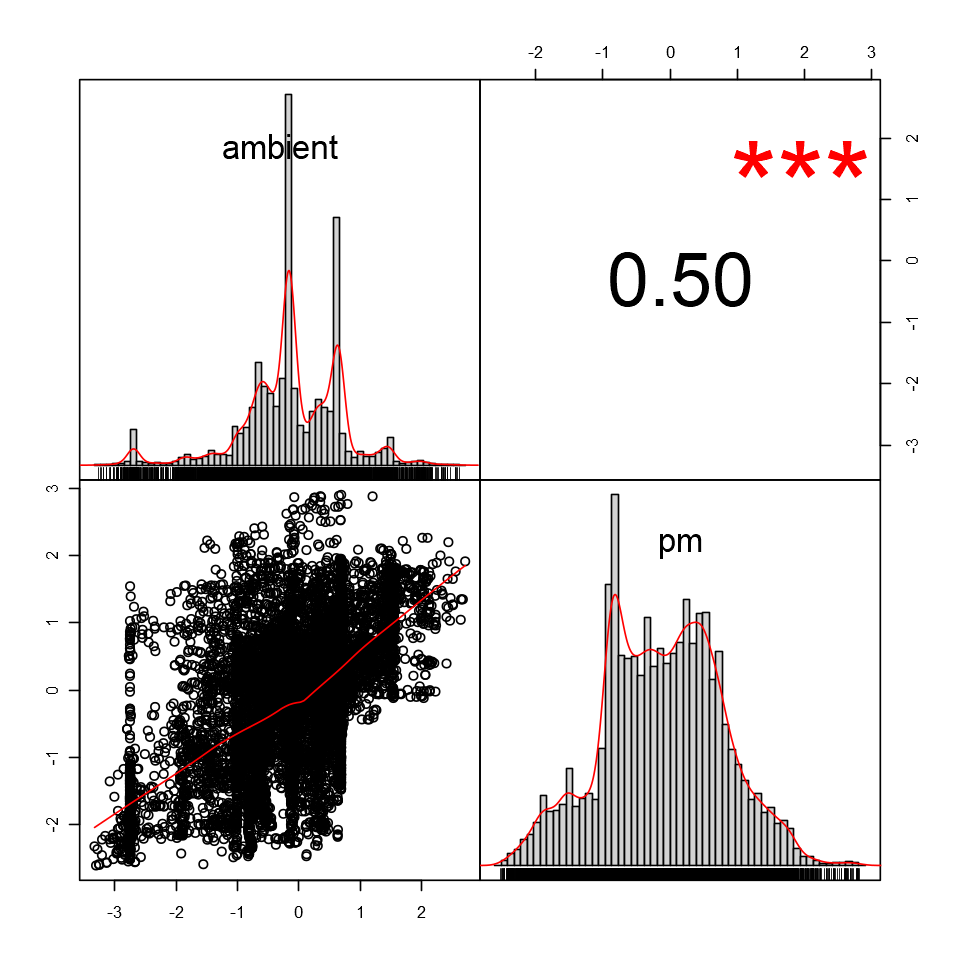

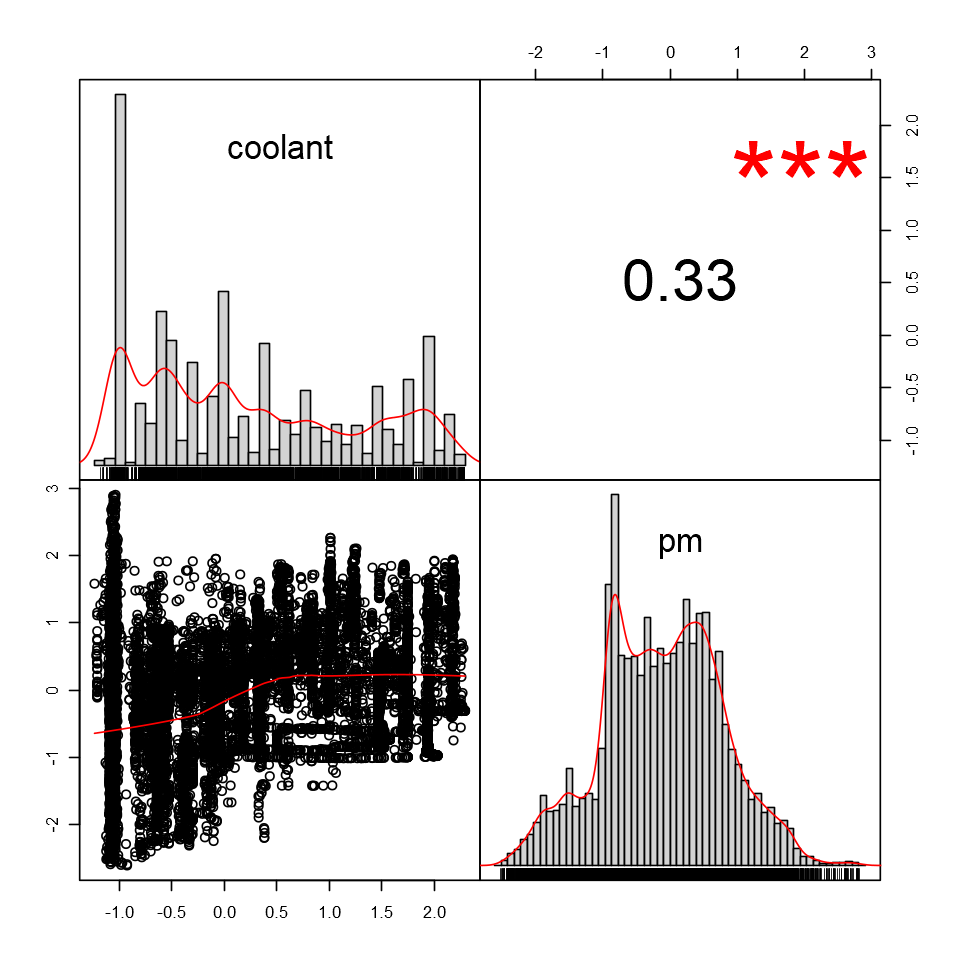

In [97]:
par(mfrow=c(1,3))

chart.Correlation(pmDF[,c(1,9)], histogram=TRUE, pch=10)
chart.Correlation(pmDF[,c(2,9)], histogram=TRUE, pch=10)

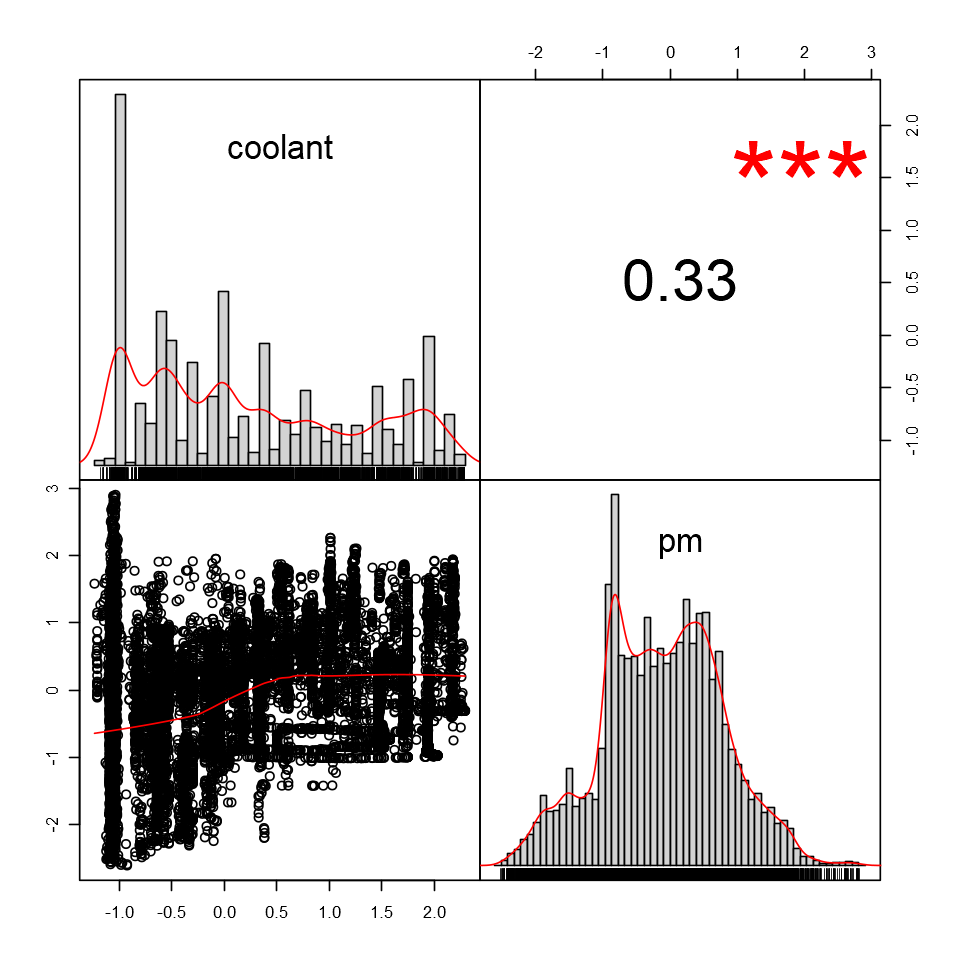

In [98]:
chart.Correlation(pmDF[,c(2,9)], histogram=TRUE, pch=19)




1. This plot shows that the pm is increasing as the values of ambient increases but coolant does not show such a consistent linear assoication.

2. For the plot between coolant and pm, the values are increasing and slowly stabilizes after a point. 
3. Ambient and coolant both are positvely correlated with the target variable pm. 

### 3.8 Summary of dataset analysis

#### Overview

The dataset provided  has **15147** records with **9 attributes** for each record. 


#### Univariate Analysis
<b>Box Plot </b>


1. The box plot shows that there are outliers present in the variables: ambient, u_d, torque, i_d i_q and the target variable p_m. Sometimes outliers are very crucial, simply dropping them will have significant impact. 

2. However, since we do not have sufficient information about the range of these variables to decide whether a particular outlier is due to a data error or it is a gneuine value none of these outliers are going to be removed.

3. For all the variables, many values are in negative which explains that log transformations are difficult and for some variables like i_q, torque, motor speed, coolant have median less than 0 therefore many values less than 0.

4. Medians are great because they are robust to outliers.

<b>Describe function :</b>

**From the description table the following insights, I have dervied:**
1. No NA values in any of the variables which explains that there are no null values in the dataset.
2. For perfect normal normal distribution skew is 0. Here ambient shows a skewness of -0.64 and i_d has a skewness of -0.83 have high negative skew left skewed distribution. 

3. coolant has +0.46 skew, u_q has skew of +0.41 and motor_speed has skew of +0.53. All of these variables have moderately positive skew which means they are skewed to the right. 

4. pm, u_d have almost zero skew, does not require any transformation of the variable.

5. torque and i_q have slight positive skew (right skewed), may not require any transformation. 
 
<b>Density plot:</b>


From the below density plots, I can derive the following insights:

**In a perfectly symmetrical distribution, the mean and the median are the same**
1. Ambient has right skew
2. Torque has a left skewed distribution 
3. torque and i_q have slight positive skew (right skewed).
4. The variable i_d has a highly negative skew



#### Bivariate Analysis

1. This plot shows that the pm is increasing as the values of ambient increases but coolant does not show such a consistent linear assoication.
2. For the plot between coolant and pm, the values are increasing and slowly stabilizes after a point.


#### Multivariate Analysis

The correlation matrix shows:
- u_d strongly negatively correlated with torque and i_q
- There is a moderate correlation between u_d and i_d
- u_q is correlated with motor_speed
- torque and i_q are have very high positive correlation
- pm, ambient, coolant, motor_speed, i_d are having decent correlation


## 4. Methodology

I will be using 3 main types of models in this assignment, `Linear Regression Model`, `Polynomial Regression `, `Support Vector Machine`, and ` Extreme Gradient Boosting Machine`. I choose `Linear Regression Model` to be a base model to see if the dataset fit with the linear relationship or not and if it seems like the dataset is non-linear, I will perform tree based models,`Support Vector Machine(SVM)` and `Extreme Gradient Boosting Machine`, which can deal with non-linear data very well. 


To improve the accurace and reduce the model complexity, I have also used `Regularization` techniques such as `L2 Regularization or Ridge Regression Model` and `L1 Regularization or Lasso Regression Model`. `L1 Regularization or Lasso Regression Model` can also be used for `Feature Engineering` and therefore can help in potraying which variables exert more influence on the target variable. Traditional `Cross Validation techniques` using 10 fold cross validation (CV) is used to better mmodel the data.


The explanations of each models are below.

#### 4.1.1 (Multiple) Linear Regression Model<a class="anchor" id="sec_4_1"></a>
Linear Regression Model is a simple model which is good to be a base model to see if there is any linear relationship between `dependent(target)` and `independent` variable or not by considering statistical metrics, residuals, and other methods which will be discussed in the `Model Development` session. For this dataset, we will use `Multiple Linear Regression` because there are more than 1 independent variables and the formula is shown below ("Linear regression", 2020). <br><br>
<center>$ Y_i = \beta_{0} + \beta_{1}X_i1 +... + \beta_{p}X_ip + \varepsilon_i, i = 1,...,n $ </center> <br>
Where:<br>
Y is a dependent(target) variable. <br>
X are independent variables.<br>
$\varepsilon$ is an error variable.<br>
$\beta$ are regression coefficients where $\beta_{0}$ is an intercept term.

For this dataset, there are 8 independent variables(X) and our target variable(Y) is Rotor Temperature(PM).

#### 4.1.2 Polynomial Regression

As referred from the textbook material for the Applied Data Analysis. To overcome under-fitting, we need to increase the complexity of the model and thus use polynomial regression. To convert the original features into their higher order terms we will use the Polynomial Features. This function fits a polynomial regression model to powers of a single predictor by the method of linear least squares.
<br><br>
<center>$ Y_i = \beta_{0} + \beta_{1}X_i1^2 +... + \beta_{p}X_ip^2 + \varepsilon_i, i = 1,...,n $ </center> <br>
Where:<br>
Y is a dependent(target) variable. <br>
X are independent variables.<br>
$\varepsilon$ is an error variable.<br>
$\beta$ are regression coefficients where $\beta_{0}$ is an intercept term.

#### 4.1.2 Ridge Regression

The assumptions of ridge regression are the same as that of linear regression: linearity, constant variance, and independence.   Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity with an additional penalty parameter that aims to minimize complexity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

#### 4.1.3 Lasso Regression

Regularization is an important concept that is used to avoid overfitting of the data, especially when the trained and test data are much varying.

Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, to achieve a lesser variance with the tested data and also restricts the influence of predictor variables over the output variable by compressing their coefficients.

The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.

Formula for Lasso Regression:
$$Cost Function + λ * (Sum of the absolute value of the magnitude of coefficients)$$



#### 4.1.4  Extreme Gradient Boosting
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XG boost is a varient of Gradient Boosting algorithm through parallel processing, tree pruning to handle regularization  and improve the model efficiency. It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

Gradient Boosting Machine using boosting method that turns weak learners to stronger ones. It teaches a model to predict value by minimising `mean square error(MSE)`, $\frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2$ where $\hat{y} = F(x)$ is predicted value, $y$ is actual value, and $n$ is number of samples.<br>
We will do gradient boosting for M stage, for each stage(m), $(1 \leq m \leq M)$, the weakest model $F_m$ can be used to predict only the mean of y. 

#### 4.1.5 Support Vector Machine
Support Vector Regression is similar to Linear Regression in that the equation of the line is y= wx+b In Support Vectorrs, this straight line is referred to as hyperplane. 

The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors which is used to plot the boundary line. 
Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. 

The objective is to basically consider the points that are within the decision boundary line


A kernel helps us find a hyperplane in the higher dimensional space without increasing the computational cost.

## 5. Model Development

In this section of the assignment, we will see the model implementation, parameter selection and other relevant methods. In order to evaluate the accuracy of the model, I will use the main metric which is`Root Mean Square Error(RMSE)`,  and `R-squared`.

- Root Mean Square Error(RMSE):<br>
It is a standard deviation of prediction error(residual) which is the different between actual value($y$) and predicted value($\hat{y}$). It evaluates how spread the predicted value are from the actual value, thus, the lower `RMSE` the better the prediction ("RMSE", 2020).
<br><br>

<center>$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }$</center> <br><br>



- R-squared:<br>
This is one of the most common statistical measurement. It implies the variation of dependent(target) variable that is given by independent variable. The higher $R^2$, the better the model ("R-Squared", 2020).


<center>$R^2 = 1- \frac{RSS}{TSS} $</center> <br>
<center>$R^2 = 1- \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y}_i)^2} $</center> <br><br>


- Function to Calculate Model Accuracy Statistics


Calculate the TSS and RSS as:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$

Calculate the statistics according to the following formulae:
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$
- Residual standard error - $\sqrt{\frac{1}{df}RSS}$
- F-statistics - $\frac{(TSS - RSS)/p}{RSS / df}$

In [99]:
Model.Accuracy <- function(predicted, target, df, p) {
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- rss + (predicted[i]-target[i])^2
        tss <- tss + (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    rse <- sqrt(rss/df)
    f.stat <- ((tss-rss)/p) / (rss/df)
    return(list(rsquared=rsquared,rse=rse,f.stat=f.stat))
}

In [100]:
RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

### 5.1 Multiple Linear Regression Model- Reference/ Base Model

The first model used is the basic multiple linear regression model after which `stepwise function` to eliminate the least influential variables and only keep the most influential variables.


In [101]:
trainDF['pm']<-train_pm

In [102]:
# lm requires 
fit1 <- lm(pm ~ ., data=trainDF)
summary(fit1)


Call:
lm(formula = pm ~ ., data = trainDF)

Residuals:
   Min     1Q Median     3Q    Max 
-2.840 -0.458 -0.003  0.460  3.277 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.00856    0.00735    1.16   0.2445    
ambient      0.36617    0.00842   43.46   <2e-16 ***
coolant      0.32543    0.00832   39.10   <2e-16 ***
u_d         -0.17311    0.01613  -10.73   <2e-16 ***
u_q         -0.34809    0.01602  -21.73   <2e-16 ***
motor_speed  0.55801    0.02381   23.44   <2e-16 ***
torque      -0.32848    0.11797   -2.78   0.0054 ** 
i_d          0.03908    0.01690    2.31   0.0208 *  
i_q          0.24339    0.11091    2.19   0.0282 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.722 on 9643 degrees of freedom
Multiple R-squared:  0.492,	Adjusted R-squared:  0.491 
F-statistic: 1.17e+03 on 8 and 9643 DF,  p-value: <2e-16


 From the above mode, I have dervied that `R-squared` is low at only `0.491`. We have `F-statistic = 1.17e+03` in this model. The $ p-values$ for the coefficients show ambeint, coolant, u_d, u_q, motor speed and torque are significant at the 0.05 level.
 
Similarly for these vairables the `t value` is also much greater and far from 1.




The `adjusted R-squared` value indicates this model explains 49.1% of the variation in electric rotor temperature.

The `F-statistic` 1.38e+03 has a p-value < 2e-16 - so reject the null hypothesis (the model explains nothing) - the model is useful


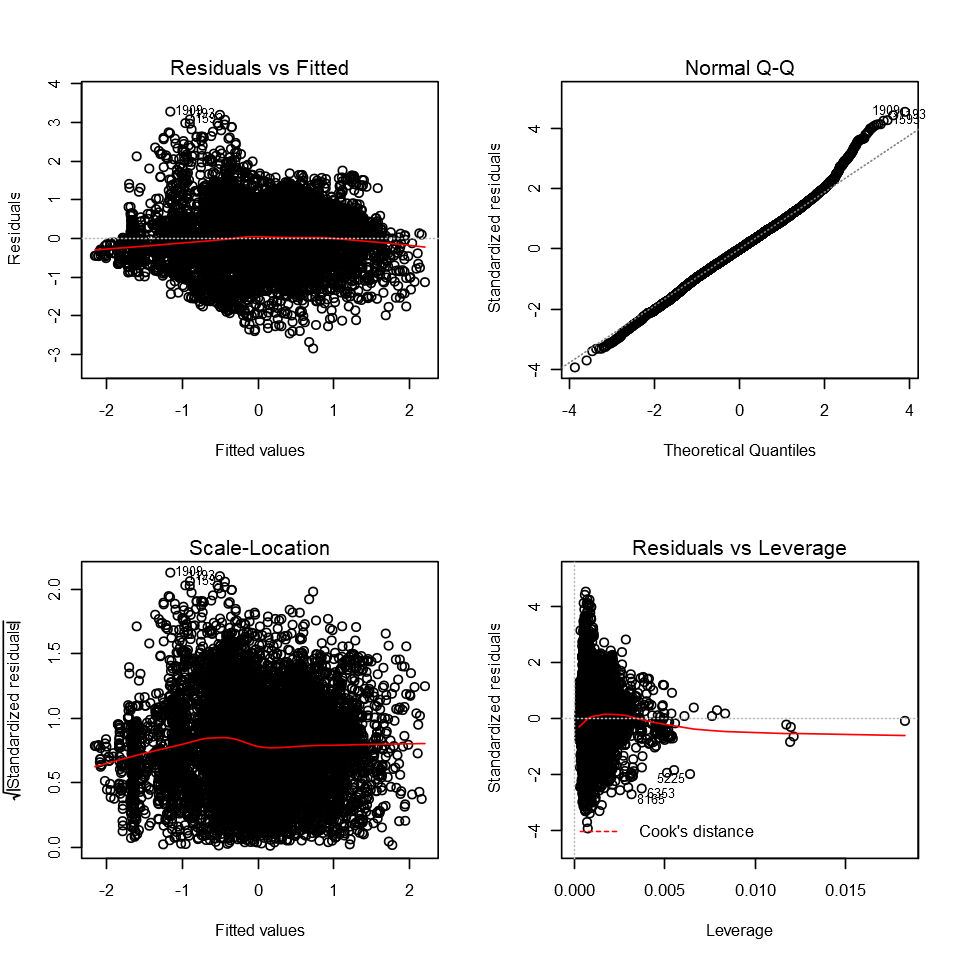

In [103]:
par(mfrow=c(2,2))
plot(fit1)


From the plots above, we can see that `stepwise` doesn't improve the performance much as all the plots look the same; it only helps with the complexity of the model. We can see the `Residuals vs Fitted` plot implies non-linear relationship as well as `Normal Q-Q` plot; we can see that the tail is very far from the fitted line. 
The model plots show:
- Residual vs Fitted - plot implies non-linear relationship as This model violates the assumption of homoscedasticity - the error terms change along the regression line
- Normal Q-Q - the residuals does not deviate significantly from the dashed line, however they change towards the end of the plot indicating the residuals are more or less normally distributed but not towards the end. Though the values which are greater than 2.0 are deviating from the dashed line. We can also notice the possible outliers such sample number 1909, which are very few.
- Scale-Location/ Fitted Values Plot - The chart shows that the model does not violate much of the assumption of equal variance, though it has slightly violated in the case of fitted values (-2, -1).
- Residuals vs Leverage - It helps us to find out the influential samples in the data - Outliers, leverage samples and influential observations. It also helps us in identifying heteroscadacity and non-linearity. 

The charts show that there are some possibly influential outliers.

####  Verify the test accuracy

In [104]:
# make predictions using the linear model fit1
predicted <- predict(fit1, testDF)

In [210]:
# Compare the accuracy statistics of train and test

#actual_pm = unname(unlist(test_pm[,]))
#predicted_pm = unname(unlist(predicted[,]))

R2 = R2_Score(actual_pm, predicted_pm)

RMSE_train = rmse(actual = trainDF$pm, 
                   predicted = fit1$fitted.values)

RMSE_test = rmse(actual = unname(unlist(test_pm[,])),
                  predicted = predicted)


cat("Train RMSE\t:", RMSE_train)
cat("\nTest RMSE\t:", RMSE_test)
cat("\nR^2\t:", R2)

Warning message in mean.default(se(actual, predicted)):
"argument is not numeric or logical: returning NA"

Train RMSE	: 0.7219
Test RMSE	: NA
R^2	: -0.03384

####  Use step function to remove unimportant variables

In [106]:
step(fit1)

Start:  AIC=-6272
pm ~ ambient + coolant + u_d + u_q + motor_speed + torque + i_d + 
    i_q

              Df Sum of Sq  RSS   AIC
<none>                     5030 -6272
- i_q          1         3 5033 -6269
- i_d          1         3 5033 -6269
- torque       1         4 5034 -6266
- u_d          1        60 5090 -6160
- u_q          1       246 5277 -5813
- motor_speed  1       287 5317 -5739
- coolant      1       798 5828 -4854
- ambient      1       985 6016 -4547



Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q, data = trainDF)

Coefficients:
(Intercept)      ambient      coolant          u_d          u_q  motor_speed  
    0.00856      0.36617      0.32543     -0.17311     -0.34809      0.55801  
     torque          i_d          i_q  
   -0.32848      0.03908      0.24339  


It seems that the step function indicates the variables which have a larger impact on the target variable.

Running step in backward direction has not removed any variables, so all are significant

### 5.2 Second Model: Handling Correlation and Interaction terms

In this task, we will add the interaction terms to the model and see if it helps or not. Identify the highly correlated variables and add some interaction terms for the correlated variables.  Interaction terms are defined as when an independent variable has different effect on the target variable depending on the values of ther independent variables. In multiple linear regression model, it is often useful to see the effect of interaction terms on the target variable.

In [108]:
fit2 <- lm(pm ~ ambient + coolant + u_d + u_q + motor_speed + torque + i_d + i_q +
           u_d:torque + u_d:i_q+ u_q:motor_speed + motor_speed:i_d + torque:i_q, 
           data = trainDF)
summary(fit2)


Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q + u_d:torque + u_d:i_q + u_q:motor_speed + 
    motor_speed:i_d + torque:i_q, data = trainDF)

Residuals:
   Min     1Q Median     3Q    Max 
-9.339 -0.409  0.004  0.404  3.217 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.41344    0.04945   28.58  < 2e-16 ***
ambient          0.33448    0.00814   41.09  < 2e-16 ***
coolant          0.25850    0.00820   31.54  < 2e-16 ***
u_d             -0.23171    0.01716  -13.50  < 2e-16 ***
u_q             -3.21014    0.08939  -35.91  < 2e-16 ***
motor_speed      4.32468    0.12037   35.93  < 2e-16 ***
torque          -0.61495    0.11456   -5.37  8.2e-08 ***
i_d              1.96092    0.07420   26.43  < 2e-16 ***
i_q              0.66449    0.10708    6.21  5.7e-10 ***
u_d:torque       0.35133    0.14345    2.45    0.014 *  
u_d:i_q         -0.44254    0.14310   -3.09    0.002 ** 
u_q:motor_speed -0.13852    

R-Squared: 0.5597

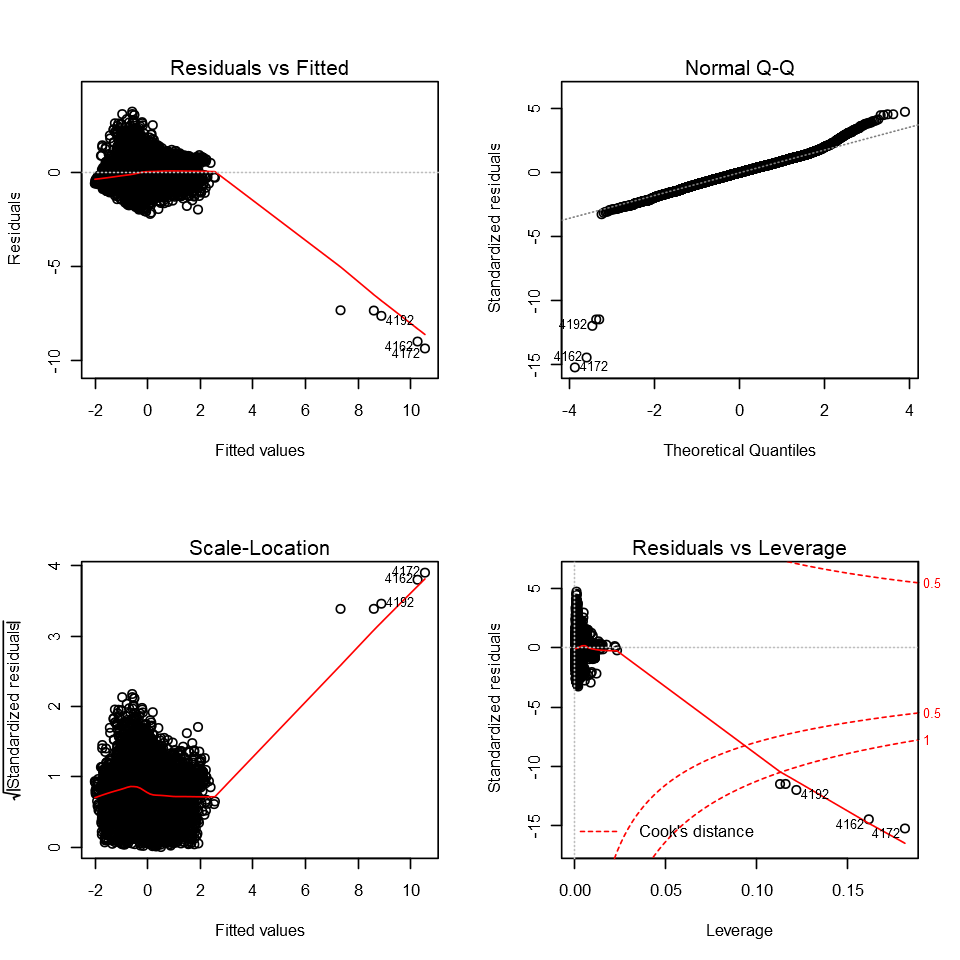

In [109]:
pmDF.predict <- fit2$fitted.values
cat("R-Squared:", Model.Accuracy(pmDF.predict,pmDF$pm,9863,8)$rsquared)

par(mfrow=c(2,2))
plot(fit2)

The $R^2$ value has improved from 0.42 to 0.55 and the residual plots are still looking good. The charts show that there are some possibly influential outliers which might effect the value of $R^2$.

### 5.3 L2 Regularization/Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. The RIdge regression performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. 

In this task I will be implementing model tuning and selection feature such as Ridge and Lasso Regression techniques ti improve the model accuracy than the previous linear regression model. I will also apply `repeated 10 fold cross validation`.

Cross-validation is a resampling procedure and it's objective is to test a machine learning model's capability to predict new data, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

The ridge regression will add a penalty term the coefficients, such that those who are the least efficient in your estimation will shrink the fastest. As I increase the Lambda, I am  penalizing more and reducing the model complexity.

In [111]:
set.seed(123)    # seef for reproducibility
# library(glmnet)  # for ridge regression
# #library(dplyr)   # for data cleaning

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loaded glmnet 2.0-16


Attaching package: 'glmnet'

The following object is masked from 'package:Metrics':

    auc



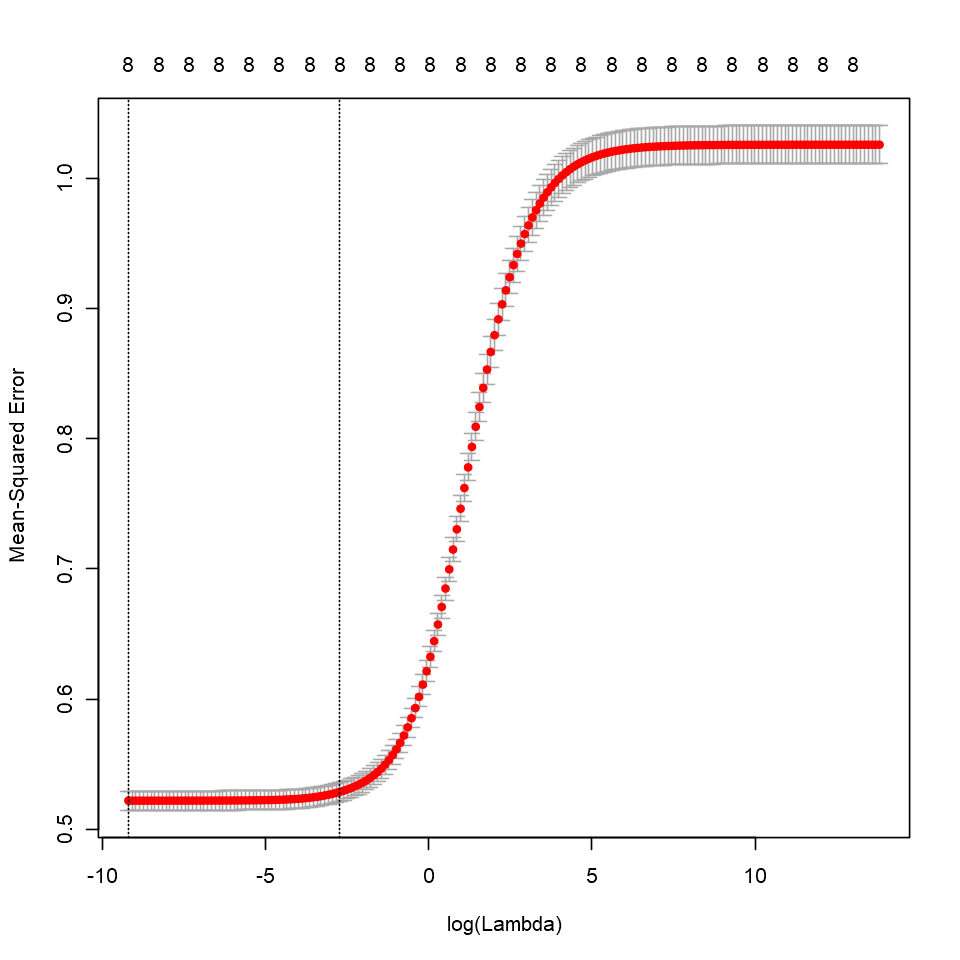

In [112]:
# glmnet expects the data in the matrix format
X <- as.matrix(trainDF[,1:8])
y <- as.matrix(train_pm)

# Search space for selecting optimal lambda value
lambdas <- 10^seq(-4, 6, length.out = 200)

ridge_cv <- cv.glmnet(X, 
                      y, 
                      alpha = 0, 
                      lambda = lambdas,
                      standardize = TRUE, 
                      nfolds = 10)


plot(ridge_cv)

In [113]:
# Best cross-validated lambda
lambda_cv <- ridge_cv$lambda.min

# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(X, 
                   y, 
                   alpha = 0, 
                   lambda = lambda_cv, 
                   standardize = TRUE)



In [114]:
ridge.fitted <- predict(model_cv, X) # Model Evaluation

In [212]:
summary(ridge.fitted)

       s0         
 Min.   :-2.1409  
 1st Qu.:-0.4298  
 Median : 0.0375  
 Mean   : 0.0112  
 3rd Qu.: 0.4937  
 Max.   : 2.2073  

In [115]:
# Predict with test data using Rdige regresssion model
test_mat <- as.matrix(testDF)
predicted <- predict(model_cv, test_mat)

In [116]:
# Evaluate the test accuracy
RMSE_train = rmse(actual = trainDF$pm, 
                  predicted = ridge.fitted)

RMSE_test = rmse(actual = unname(unlist(test_pm[,])), 
                 predicted = predicted)

cat("Train RMSE\t:", RMSE_train)
cat("\nTest RMSE\t:", RMSE_test)

Train RMSE	: 0.7219
Test RMSE	: 0.7095

Here, we can see that Ridge regression has improved the test RMSE very slightly, to 0.7095, which is a significant improvement over the previous model.

Therefore we can say the adding penalty term reduces the model complexity and increases the accuracy value. 

### 5.4 L1 Regularization/Lasso Regression

##### Studying Variable Influence for Inference Task

Primarliy Lasso regression is used to obtain the subset of predictors that minimizes prediction error of the target variable. It imposes a penalty term namely lambda on the model parameters that causes  coefficients for the variables to shrink toward zero. This helps in selecting the most influential parameters for the models. Therefore, it can also be used for feature engineering.

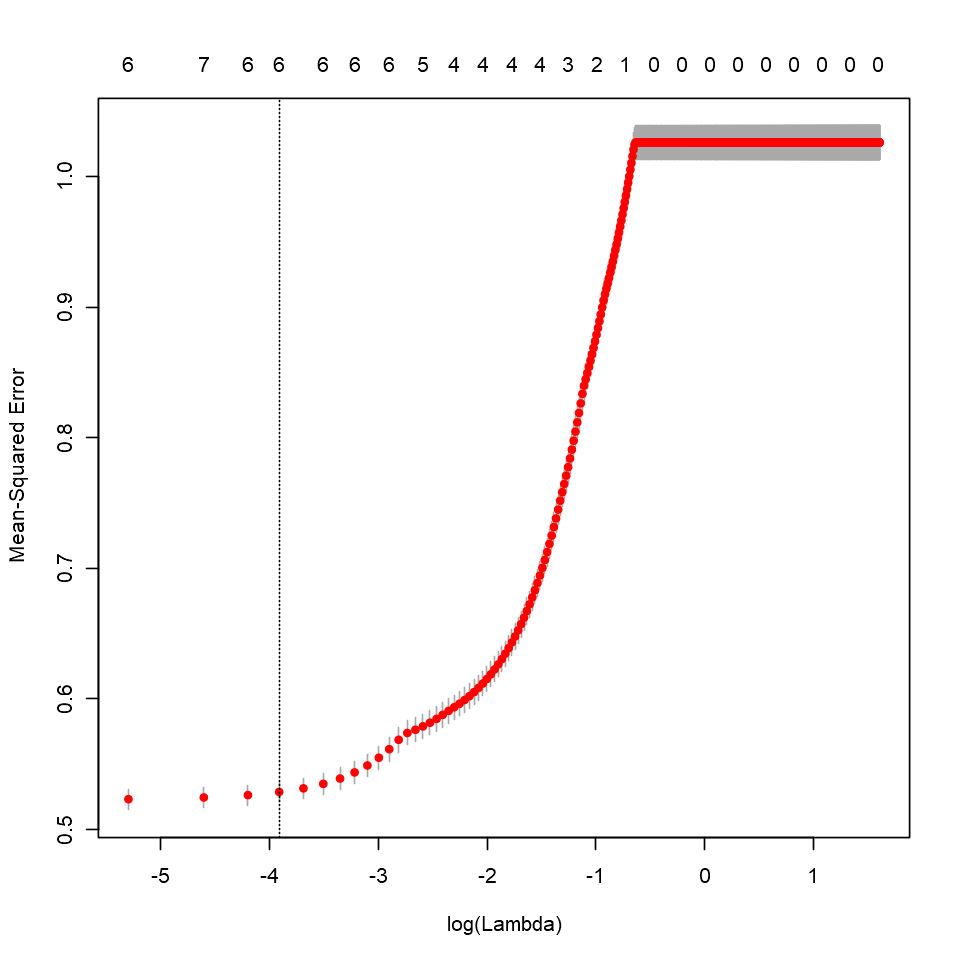

In [117]:
lambdas = seq(0, 5, length = 1000)

lasso_cv <- cv.glmnet(X, 
                      y, 
                      alpha = 1, 
                      lambda = lambdas,
                      standardize = TRUE, 
                      nfolds = 10)


plot(lasso_cv)

In [118]:
# Best cross-validated lambda
lambda_cv <- lasso_cv$lambda.min

# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(X, y, alpha = 1, lambda = lambda_cv, standardize = TRUE)



In [119]:
# Predictions on train data and Model Evaluation
lasso.fitted <- predict(model_cv, X)

In [120]:
# Predict with test data using Rdige regresssion model
test_mat <- as.matrix(testDF)
predicted <- predict(model_cv, test_mat)

In [121]:
# Evaluate the test accuracy
RMSE_train = rmse(actual = trainDF$pm, 
                  predicted = lasso.fitted)
RMSE_test = rmse(actual = unname(unlist(test_pm[,])), 
                 predicted = predicted)

cat("Train RMSE\t:", RMSE_train)
cat("\nTest RMSE\t:", RMSE_test)

Train RMSE	: 0.7219
Test RMSE	: 0.7096

The results are more or less same as simple linear and ridge regression. Lasso Regression has very minute effect on it.

### 5.5 Polynomial Regression

In this section of the code, I will try to implement Polynomial Regression raised to the power 2 . Also noting that sincere there are some influential points. I would also try to remove the outliers and then check the accuracy of the model again to see if Polynomial Regression models genralises the testing data well.

In [122]:
fit8a <- lm(pm ~ poly(ambient,2)+poly(coolant,2)+poly(u_d,2)+
            poly(u_q,2)+poly(motor_speed,2)+poly(torque,2)
            +poly(i_d,2)+poly(i_q,2)
           +u_d:torque + u_d:i_q+ u_q:motor_speed + motor_speed:i_d + torque:i_q,
           data=trainDF)
summary(fit8a)


Call:
lm(formula = pm ~ poly(ambient, 2) + poly(coolant, 2) + poly(u_d, 
    2) + poly(u_q, 2) + poly(motor_speed, 2) + poly(torque, 2) + 
    poly(i_d, 2) + poly(i_q, 2) + u_d:torque + u_d:i_q + u_q:motor_speed + 
    motor_speed:i_d + torque:i_q, data = trainDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.588  -0.387   0.008   0.385   3.332 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.77e+01   1.70e+00  -22.14  < 2e-16 ***
poly(ambient, 2)1      3.12e+01   8.29e-01   37.68  < 2e-16 ***
poly(ambient, 2)2      1.60e+00   6.73e-01    2.38  0.01755 *  
poly(coolant, 2)1      2.33e+01   7.89e-01   29.52  < 2e-16 ***
poly(coolant, 2)2      2.25e+00   7.06e-01    3.19  0.00144 ** 
poly(u_d, 2)1         -4.19e+01   1.97e+00  -21.22  < 2e-16 ***
poly(u_d, 2)2          1.53e+01   4.54e+00    3.36  0.00078 ***
poly(u_q, 2)1         -3.95e+02   9.74e+00  -40.54  < 2e-16 ***
poly(u_q, 2)2         -3.40e-01   1.48e+00   -0.2

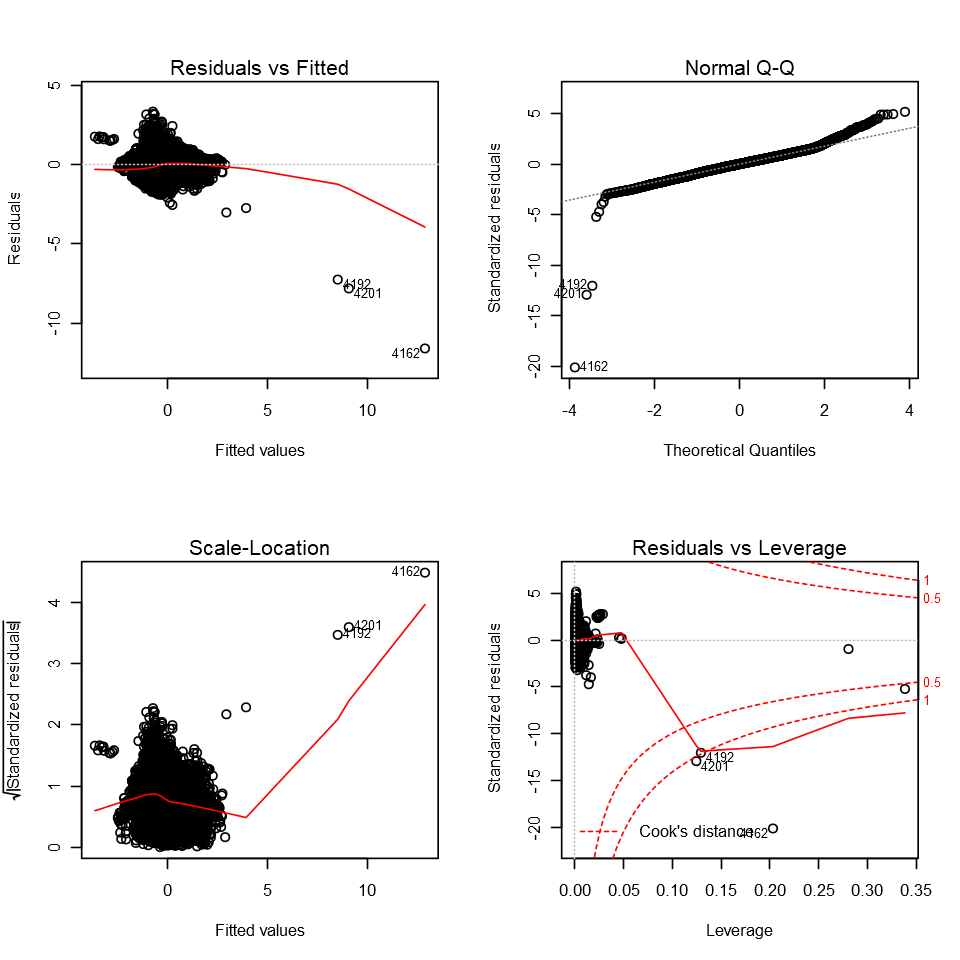

In [123]:
# Residual Plot
par(mfrow=c(2,2))
plot(fit8a)

The  𝑅2  value has improved from 0.42 of linear regression model (base model) to to 0.593 of polynormial regression and the residual plots are looking better and there are some possibly influential outliers.


#### Rebuilding the model after removing outliers

In [124]:
trainoDF <- trainDF[-c(4192,4201,4162),]

In [125]:
fit8c <- lm(pm ~ poly(ambient,3)+poly(coolant,3)+poly(u_d,3)+
            poly(u_q,3)+poly(motor_speed,3)+poly(torque,3)
            +poly(i_d,3)+poly(i_q,3)
           +u_d:torque + u_d:i_q+ u_q:motor_speed + motor_speed:i_d + torque:i_q,
           data=trainoDF)
summary(fit8c)


Call:
lm(formula = pm ~ poly(ambient, 3) + poly(coolant, 3) + poly(u_d, 
    3) + poly(u_q, 3) + poly(motor_speed, 3) + poly(torque, 3) + 
    poly(i_d, 3) + poly(i_q, 3) + u_d:torque + u_d:i_q + u_q:motor_speed + 
    motor_speed:i_d + torque:i_q, data = trainoDF)

Residuals:
   Min     1Q Median     3Q    Max 
-5.888 -0.355  0.004  0.348  3.493 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -6.54e+01   1.95e+00  -33.55  < 2e-16 ***
poly(ambient, 3)1      3.04e+01   7.79e-01   38.99  < 2e-16 ***
poly(ambient, 3)2     -2.36e+00   6.39e-01   -3.69  0.00022 ***
poly(ambient, 3)3      2.85e+00   6.19e-01    4.61  4.0e-06 ***
poly(coolant, 3)1      1.53e+01   7.57e-01   20.24  < 2e-16 ***
poly(coolant, 3)2      1.31e+00   6.60e-01    1.98  0.04749 *  
poly(coolant, 3)3     -7.88e+00   6.22e-01  -12.66  < 2e-16 ***
poly(u_d, 3)1         -4.48e+01   3.07e+00  -14.62  < 2e-16 ***
poly(u_d, 3)2          3.98e+01   6.97e+00    5.71  1.2e-0

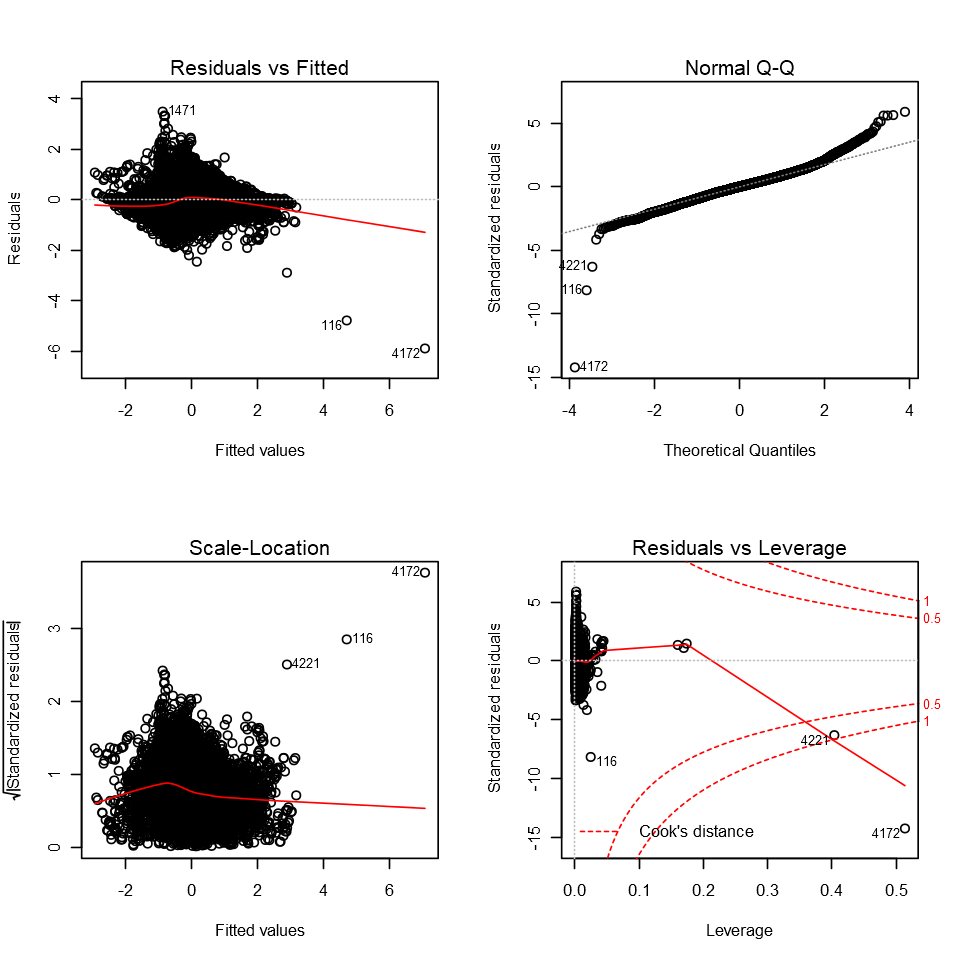

In [126]:
# Residual Plot
par(mfrow=c(2,2))
plot(fit8c)

#### Stil there are some more outliers that are ecountered 4221, 116, 4172..

In [127]:
trainoDF2 <- trainDF[-c(4192,4201,4162,4221,116,4172),]
fit8d <- lm(pm ~ poly(ambient,3)+poly(coolant,3)+poly(u_d,3)+
            poly(u_q,3)+poly(motor_speed,3)+poly(torque,3)
            +poly(i_d,3)+poly(i_q,3)
           +u_d:torque + u_d:i_q+ u_q:motor_speed + motor_speed:i_d + torque:i_q,
           data=trainoDF2)
summary(fit8d)


Call:
lm(formula = pm ~ poly(ambient, 3) + poly(coolant, 3) + poly(u_d, 
    3) + poly(u_q, 3) + poly(motor_speed, 3) + poly(torque, 3) + 
    poly(i_d, 3) + poly(i_q, 3) + u_d:torque + u_d:i_q + u_q:motor_speed + 
    motor_speed:i_d + torque:i_q, data = trainoDF2)

Residuals:
   Min     1Q Median     3Q    Max 
-2.462 -0.340  0.012  0.332  3.341 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.89e+00   3.00e+00   -1.63   0.1031    
poly(ambient, 3)1      2.69e+01   7.60e-01   35.47  < 2e-16 ***
poly(ambient, 3)2     -3.48e+00   6.16e-01   -5.64  1.7e-08 ***
poly(ambient, 3)3      3.53e+00   5.96e-01    5.92  3.3e-09 ***
poly(coolant, 3)1      1.01e+01   7.52e-01   13.43  < 2e-16 ***
poly(coolant, 3)2      1.47e+00   6.35e-01    2.31   0.0209 *  
poly(coolant, 3)3     -8.41e+00   5.99e-01  -14.04  < 2e-16 ***
poly(u_d, 3)1         -3.10e+01   3.01e+00  -10.31  < 2e-16 ***
poly(u_d, 3)2          3.90e+01   6.73e+00    5.80  6.9e-

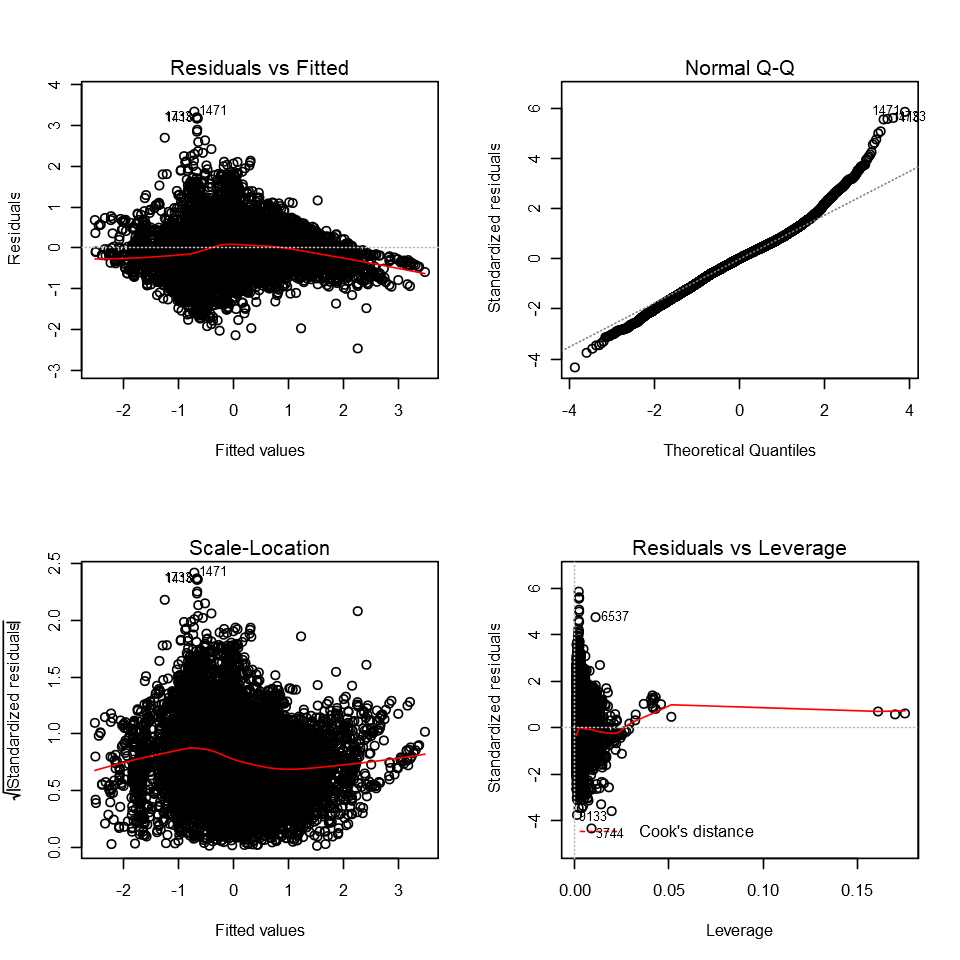

In [168]:
# Residual Plot
par(mfrow=c(2,2))
plot(fit8d)

In [171]:
RMSE_train = rmse(actual = train_pm, predicted = train_predicted)
RMSE_test = rmse(actual = test_pm, predicted = predicted_pm)
#MAE = mae(actual = actual_pm, predicted = predicted_pm)

cat("\nTrain RMSE\t:", RMSE_train)
cat("\nTest RMSE\t:", RMSE_test)

Warning message in mean.default(se(actual, predicted)):
"argument is not numeric or logical: returning NA"Warning message in mean.default(se(actual, predicted)):
"argument is not numeric or logical: returning NA"


Train RMSE	: NA
Test RMSE	: NA

## Non-linear Models

Linear models are unable to generalize well due to the non-linear assoication of the predictor vsriables and the target response. I will build two non-linear models using Support Vector Machine for Regression (SVR) and XGBoost.

#### 5.5 Extreme Gradient Boosting

In this task, I will try to implement a varion of Gradient Boosting, which is Extreme Gradient Boosting. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The hyperparameters are tuned. 

In [132]:
# glmnet expects the data in the matrix format
X <- as.matrix(trainDF[,1:8]) # Remove the target variable from trainDF while creating the matrix

# y <- scale(train_age, center = TRUE, scale = FALSE)
y <- as.matrix(train_pm)

In [133]:
set.seed("123")

params <- list(
  eta = 0.01,
  max_depth = 7,
  min_child_weight = 5,
  subsample = 0.80,
  colsample_bytree = 1
)

# train final model
xgb.fit.final <- xgboost(
  params = params,
  data = X,
  label = y,
  nrounds = 3000,
  objective = "reg:linear",
  verbose = 0
)

# Save model
# saveRDS(xgb.fit.final, "./1_model_repo/10_xgb_model.rds")

[03:28:59] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [134]:
# Predict with xgb model
train_predicted <-predict(xgb.fit.final, n.trees = xgb.fit.final$n.trees, X[,1:8])

In [135]:
# Load XGB model
#xgb.fit.final <- readRDS("./1_model_repo/10_xgb_model.rds")

# Predict with xgb model
test_mat <- as.matrix(testDF)
predicted <-predict(xgb.fit.final, n.trees = xgb.fit.final$n.trees, test_mat)

In [136]:
# Evaluate the test accuracy
# library("Metrics")
# library("MLmetrics")

actual_pm = unlist(test_pm[,])
predicted_pm = predicted
RMSE_train = rmse(actual = actual_pm, predicted = train_predicted)
RMSE_test = rmse(actual = actual_pm, predicted = predicted_pm)
#MAE = mae(actual = actual_pm, predicted = predicted_pm)

cat("\nTrain RMSE\t:", RMSE_train)
cat("\nTest RMSE\t:", RMSE_test)


Warning message:
"package 'MLmetrics' was built under R version 3.6.3"
Attaching package: 'MLmetrics'

The following object is masked _by_ '.GlobalEnv':

    RMSE

The following objects are masked from 'package:caret':

    MAE, RMSE

The following objects are masked from 'package:measures':

    AUC, MAE, MAPE, MSE, RAE, RMSE, RMSLE, RRSE

The following object is masked from 'package:base':

    Recall

Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"


Train RMSE	: 1.226
Test RMSE	: 0.8291

In [139]:
dim(trainDF)

[1] 9652    9

In [140]:
dim(testDF)

[1] 5495    8

### 5.6 Support Vector Machine(SVM): Final Model

The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at predicting all training examples correctly.

In [185]:
install.packages("rminer")

also installing the dependencies 'doParallel', 'plotrix', 'kknn', 'pls', 'mda', 'adabag', 'Cubist', 'kernlab'



package 'doParallel' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked
package 'pls' successfully unpacked and MD5 sums checked
package 'mda' successfully unpacked and MD5 sums checked
package 'adabag' successfully unpacked and MD5 sums checked
package 'Cubist' successfully unpacked and MD5 sums checked
package 'kernlab' successfully unpacked and MD5 sums checked
package 'rminer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Digital India\AppData\Local\Temp\RtmpElBW5O\downloaded_packages


In [186]:
library(rminer)

Warning message:
"package 'rminer' was built under R version 3.6.3"
Attaching package: 'rminer'

The following object is masked from 'package:party':

    fit

The following object is masked from 'package:modeltools':

    fit



In [157]:
svr_main_model <- svm(pm ~ .+log(abs(i_q))+log(abs(torque))+motor_speed:i_d
+u_q:i_q+i_q:torque ,
          data=trainDF,
          type='nu-regression',cost=20, epsilon=0.01,
                 kernel='radial')

# print results for training dataset



In [158]:
predicted <-predict(svr_main_model, test)

In [159]:
actual_pm = unlist(test_pm[,])
predicted_pm = predicted

In [160]:
RMSE_train = rmse(actual = actual_pm, predicted = train_predicted)
RMSE_test = rmse(actual = actual_pm, predicted = predicted_pm)
#MAE = mae(actual = actual_pm, predicted = predicted_pm)

cat("\nTrain RMSE\t:", RMSE_train)
cat("\nTest RMSE\t:", RMSE_test)

Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"


Train RMSE	: 1.226
Test RMSE	: 0.5898

In [198]:
head(train_pm)

pm
-0.08831
0.71040
-1.59260
-0.14167
-1.96489
-1.77564


### Variable Importance for SVM

#### Inference task

In [214]:
#Calculataing variable importance matrix
roc_imp <- filterVarImp(x = trainDF, y = train_pm$pm, measure='Gain')
head(roc_imp)

Warning message in summary.lm(lm(y ~ data, na.action = na.omit)):
"essentially perfect fit: summary may be unreliable"

,Overall
ambient,59.692
coolant,49.604
u_d,6.786
u_q,10.157
motor_speed,35.389
torque,9.234


In [204]:
roc_imp<-as.matrix(roc_imp)

## 6. Model Interpretation for XG Boost

XG Boost

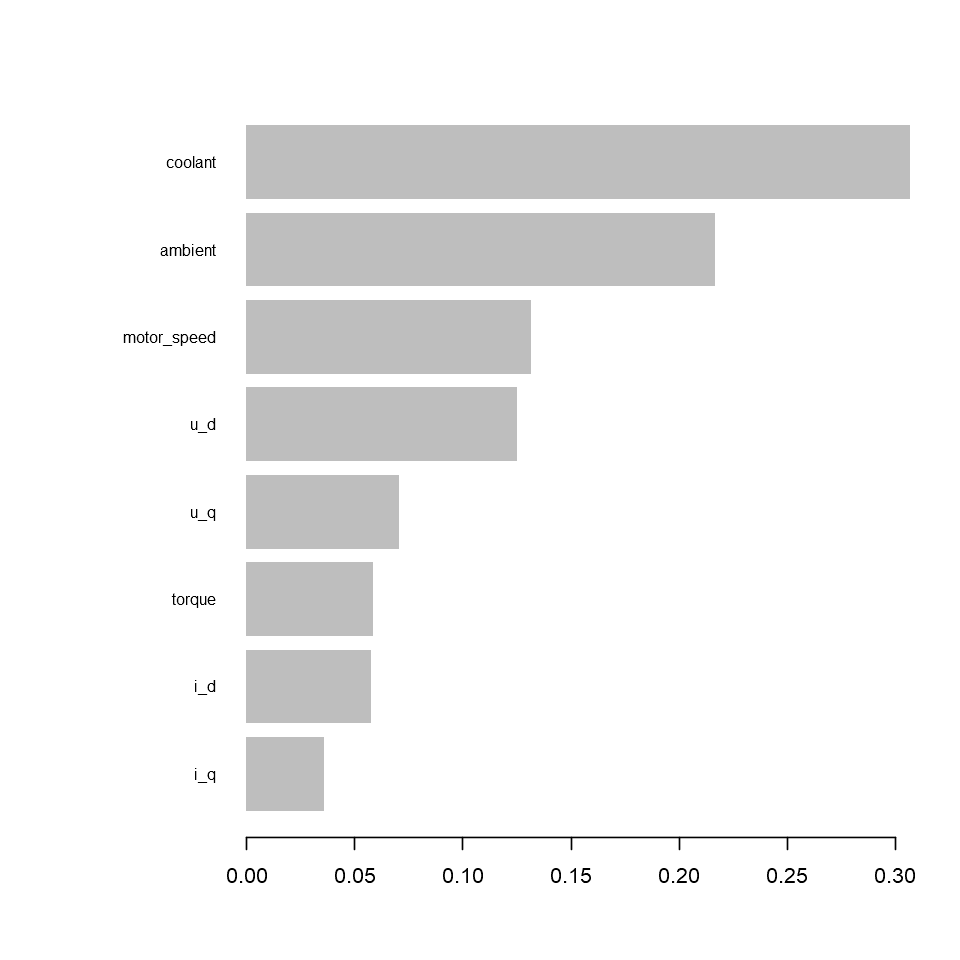

In [167]:


# create importance matrix
importance_matrix <- xgb.importance(model = xgb.fit.final)

# variable importance plot
xgb.plot.importance(importance_matrix, top_n = 8, measure = "Gain")

#dev.off()


In [207]:
importance_matrix

Feature,Gain,Cover,Frequency,Importance
coolant,0.30655,0.18143,0.18511,0.30655
ambient,0.21617,0.11199,0.16733,0.21617
motor_speed,0.13116,0.11507,0.09799,0.13116
u_d,0.12480,0.13827,0.14232,0.12480
u_q,0.07045,0.15424,0.14575,0.07045
torque,0.05811,0.09118,0.08495,0.05811
i_d,0.05724,0.12095,0.11527,0.05724
i_q,0.03552,0.08688,0.06127,0.03552


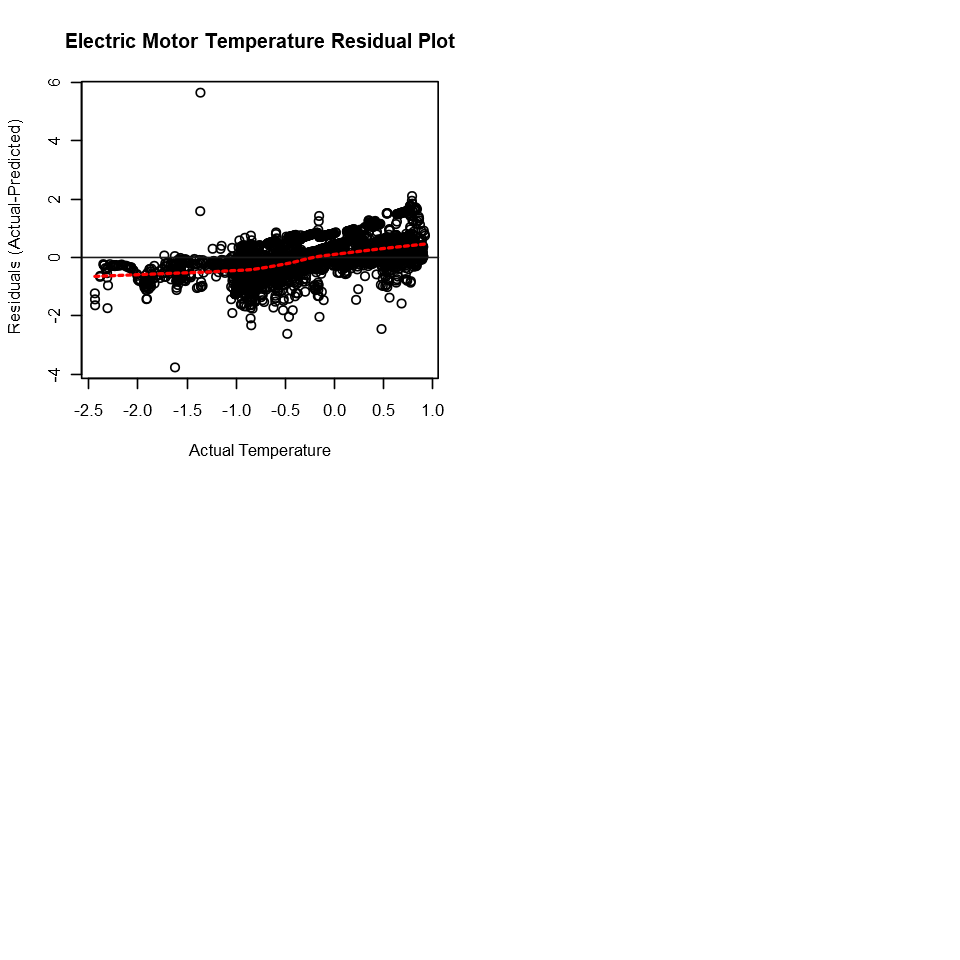

In [162]:

par(mfrow=c(2,2))
plot(actual_pm, 
     actual_pm-predicted_pm, 
     main="Electric Motor Temperature Residual Plot", 
     ylab="Residuals (Actual-Predicted)", 
     xlab="Actual Temperature"
     #ylim=c(-2,8)
    )

abline(h=0,lty=1,col="gray10")
lines(lowess(actual_pm, actual_pm-predicted_pm), lwd=2, lty=2, col = "red") 


### 7. Results and Discussion


After all the models applied above , I will compare and select the best model. The evaluation metrics used are `RMSE`and `RSquared`. We are looking for the model that has lowest `RMSE`,  and the highest `RSquared` to be the best model.


| Model| RMSE Train | RMSE Test | R_Squared |
| --- | --- | --- | --- |
| Linear Regression | 0.729 | 0.7096 | 0.491 |
| LM with Interaction Terms | 0.557 | 0.750 | 0.551 |
| Ridge Regression | 0.7219 | 0.7095 | 0.601 |
| Lasso Regression | 0.7219 | 0.7096 | 0.601 |
| Polynomial Regression | 0.75 | 0.801 | 0.593 |
| Polynomial Regression with no outliers | 0.76 | 0.801 | 0.682 |
| XG Boost | 1.226 | 0.8291 | -- |
| SVM | 1.226 | 0.5898 | -- |

From the table above, we can conclude that:
1. `Linear Model` : From the Linear models, I have applied Multiple linear Regression and have used step function to eliminate all the other vairables with less significance. Since there are non linear relationships in the data it was very difficutl to fit the linear mmodel. Hence the accuracy of the model `RSquared = 0.491` is very less while RMSE is very high with `RMSE Train = 0.72` and `RMSE test = 0.709`. The interaction terms improve the accuracy of the model.

2. `Ridge Regression `: Ridge regression tries to add additional penalty term to the model parameters to reduce the model complexity. In this case the accuracy `RSquared = 0.571` does seem to improve from the previous model bu the `RMSE train = 0.7219` and `RMSE test = 0.7095` do not show significant improvement. 
3. `Lasso Regression `: lasso regression also tries to add additional penalty term to the model parameters to reduce the model complexity and understand the most important features of the model. However there is no such significant improvement. 

4. `XG Boost`:  Tree based Non linear models seem to perform well as the data is non linear. THerefore, Extreme Gradient Boosting with hyperparameter tuning  gives a lot better job with `RMSE train = 1.226` and `RMSE test = 0.8`. `RSquared` is not an accurate measure of comparing the model in tree based approaches. Seeing at the test_ RMSE, we can say the model is generalised well. According to the variable importance matrix, we can also see that ambient, coolant and motor speed are the 3 most influential predictors for the model.


5. `SVM`: does a very similar job to `XG Boost`  It has `RMSE Train = 1.2` and `RMSE Test = 0.5`. This non linear model is also a great model for the data. According to the variable importance matrix, we can also see that ambient, coolant and motor speed are the 3 most influential predictors for the model. SVM is a supervised machine learning tree based decision tree in which svr is a variation of svm used for regression models. From the graphs we can also see that non linear models fir to the data very well.




### Comparison between Base Model and Final Model

`

1. `Linear Regression`:  This models, the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. The error function used in this model by the fitted line is Root Mean Square Error. The model also assumes that the predictor vairables are almost normally distributed for the model to function well. Apart from this Linear Regression also has the following assumptions: 

    a. Homoskedescticity: The residuals have constant variance and the values are same across all independent variables.
    
    b. The error terms are normally distributed.
    
    From the above, we have seen that the linear model does not seem to fit the data well as there is non linearity in the dataset. From the Q-Q plot and Residual vs Fitted plot we can also aboserve this non linearity.
    
    

2. `SVM`: Decision Tree based non linear model which in our case tries to fit the model well and has the least RMSE value for the test dataset. Here we can say that SVM is a good generalised model for our dataset as it has produced the lowest RMSE amongst all other models. The Test RMSE here is 0.5 which shows how well the model has been generalised. 

    The vairble importance is also calculated for the non linear models to understand the measure of influence exerted by the predcitor variables. FOR SVM we can see that Ambient, Coolant and Motor Speed impact the PM variable the most and it is the same for XG Boost Model as well. 
    
    The purpose of the inference task is to identify the key factors that have strong
    affect on the rotor temperature. which property contributes
    the most to your model's performance
    
    For the Inference task, we can conclude that Ambient, Motor Speed and Coolant effect the rotor temperature the most



## 8. Conclusion

This assignment focuses on predicting permanent magnet motor temperature  by doing the exploratory data analysis (`EDA`) and traning predictive models. The initial task emphasizes on on the dsitribution of each attribute and their relationships to each other from `EDA`, later on `(Multiple) Linear Regression Model`, `Polynomial Regression`, `XG Boosting Machine`, and  `SVM ` models will be trained on `Train` dataset and `Root Mean Square Error(RMSE)`, and  `R-squared`,  will be the evaluation metrics to evaluate the models performance on the testing and training dataset. The models is compared in the `Results and discussion` part along with the variable importance.

After all the analysis and model comparison, the `SVM` is the best model with `Ambient`,`Coolant`,`Motor Speed` to be the most important variables. The Test RMSE generated in this model is 0.5 which is the least amongst all the other models. 
Conversely `Linear Model` gives the worst performance because our dependent and independent variables seem to exhibit non linear relationships. 


## 9. References


1. https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2
2. https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226
3. https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
4. https://www.analyticsvidhya.com/blog/2016/01/xgboost-algorithm-easy-steps/

5. @ARTICLE{9296842,
  author={W. {Kirchgässner} and O. {Wallscheid} and J. {Böcker}},
  journal={IEEE Transactions on Power Electronics}, 
  title={Estimating Electric Motor Temperatures With Deep Residual Machine Learning}, 
  year={2021},
  volume={36},
  number={7},
  pages={7480-7488},
  doi={10.1109/TPEL.2020.3045596}}

6. Gradient boosting. En.wikipedia.org. (2020). Retrieved 9 September 2020, from https://en.wikipedia.org/wiki/Gradient_boosting.
7. RMSE: Root Mean Square Error - Statistics How To. Statistics How To. (2020). Retrieved 9 September 2020, from https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/#:~:text=Root%20Mean%20Square%20Error%20(RMSE)%20is%20the%20standard%20deviation%20of,the%20line%20of%20best%20fit.

8. R-Squared. Investopedia. (2020). Retrieved 6 September 2020, from https://www.investopedia.com/terms/r/r-squared.asp#:~:text=R%2Dsquared%20(R2),variables%20in%20a%20regression%20model.